In [1]:
import numpy as np
import matplotlib.pyplot as plt
from constants import *
from supernovaNuBoostedDM import *

/Users/yenhsun/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Sensitivity with Super-K/Hyper-K/DUNE

In [70]:
# paths
eventDir = '../data/BDM_events_Tx_min_5MeV/'

# If one choose Tx_min = 25 MeV, plese set skiprows=5 instead of 0

# Load files
# background
atmEvent = np.loadtxt(eventDir + 'atmevent_per_electron_Rstar8.5.txt', skiprows=0)[:,1]
# BDM event, eps=1
bdmEventEps1Beta0 = np.loadtxt(eventDir + 'event_eps1_Rstar8.5_beta0pi.txt', skiprows=0)[:,1]
bdmEventEps1BetaPi = np.loadtxt(eventDir + 'event_eps1_Rstar8.5_beta1pi.txt', skiprows=0)[:,1]
# BDM event, zero eps
bdmEventEps0Beta0 = np.loadtxt(eventDir + 'event_eps0_Rstar8.5_beta0pi.txt', skiprows=0)[:,1]
bdmEventEps0BetaPi = np.loadtxt(eventDir + 'event_eps0_Rstar8.5_beta1pi.txt', skiprows=0)[:,1]
# DM mass
bdmMx = np.loadtxt(eventDir + 'event_eps0_Rstar8.5_beta1pi.txt', skiprows=0)[:,0]


# Load constraints
# w/ kinetic mixing
SN_equal = 10**np.loadtxt('../data/constraints/SN1987_eps1.txt',delimiter=',') # SN equal eps and gz
CCFR_equal = 10**np.loadtxt('../data/constraints/CCFR_eps1.txt',delimiter=',') # CCFR equal eps and gz
Borexino_equal = 10**np.loadtxt('../data/constraints/Borexino_eps1.txt',delimiter=',') # Borexino equal eps and gz
StarCool_equal = 10**np.loadtxt('../data/constraints/StellarCooling_eps1.txt',delimiter=',') # Stellar cooling equal eps and gz
gm2_equal = 10**np.loadtxt('../data/constraints/g-2_eps1.txt',delimiter=',') # g-2 equal eps and gz
# no kinetic mixing
SN_nokin = 10**np.loadtxt('../data/constraints/SN1987_eps0.txt',delimiter=',') # SN no eps
CCFR_nokin = 10**np.loadtxt('../data/constraints/CCFR_eps0.txt',delimiter=',') # CCFR no eps
gm2_nokin = 10**np.loadtxt('../data/constraints/g-2_eps0.txt',delimiter=',') # g-2 no eps


# Total electron number in detector
NeSK = 7.37e33
NeHK = 7.37e34
NeDUNE = 4.58e33 # assuming 17kton


# sensitivity
def sensitivity(N_b,sigma=2):
    """
    Find the associate N_s to achieve the sigma sensitivity for given background N_b
    
    Input
    ------
    N_b: background events
    sigma: detection significance
    
    Output
    ------
    N_s: the required event number N_s
    """
    return sigma*(sigma + np.sqrt(4*N_b*sigma + sigma**2))/2


def mV_SIDM(gD,eta=1):
    eta = eta/g2MeV/to_cm2
    return gD**(4/3)/(16*np.pi**2*eta)**(1/3)


# required N_s
NsSK = sensitivity(atmEvent*NeSK)
NsHK = sensitivity(atmEvent*NeHK)
NsDUNE = sensitivity(atmEvent*NeDUNE)

### Non-zero kinetic mixing
In the loaded datasets, we note that $g_V=g_\chi=\varepsilon=1$.
In terms of non-zero kinetic mixing, the BDM event number is proportional to
$$
N_\chi \propto g_V^2 g_\chi^4 \varepsilon^2.
$$
By taking $\varepsilon=g_V$, we constraint $g_V$ with the expression
$$
g_V = \frac{1}{g_\chi}\left(\frac{N_s}{N_\chi}\right)^{1/4}.
$$

### Zero kinetic mixing
When $\varepsilon=0$, the coupling to SM lepton can be attained by a $\mu/\tau$-loop with induced mixing parameter $\varepsilon^\prime\approx- g_V/70$. The 1/70 factor has been incorporated into the dataset for $\varepsilon=0$ cases. What we need to do is again use the above expression to constrain $g_V$.

In [71]:
# BDM events with non-zero kinetic mixing
# beta = 0
bdmEventEps1Beta0_SK = bdmEventEps1Beta0*NeSK
bdmEventEps1Beta0_HK = bdmEventEps1Beta0*NeHK
bdmEventEps1Beta0_DUNE = bdmEventEps1Beta0*NeDUNE
# beta = pi
bdmEventEps1BetaPi_SK = bdmEventEps1BetaPi*NeSK
bdmEventEps1BetaPi_HK = bdmEventEps1BetaPi*NeHK
bdmEventEps1BetaPi_DUNE = bdmEventEps1BetaPi*NeDUNE
# BDM events with zero kinetic mixing
# beta = 0
bdmEventEps0Beta0_SK = bdmEventEps0Beta0*NeSK
bdmEventEps0Beta0_HK = bdmEventEps0Beta0*NeHK
bdmEventEps0Beta0_DUNE = bdmEventEps0Beta0*NeDUNE
# beta = pi
bdmEventEps0BetaPi_SK = bdmEventEps0BetaPi*NeSK
bdmEventEps0BetaPi_HK = bdmEventEps0BetaPi*NeHK
bdmEventEps0BetaPi_DUNE = bdmEventEps0BetaPi*NeDUNE

In [72]:
# Sensitivity on gV
def sensitivity_gV(Nx,Ns,gx):
    """
    Sensitivity on gV
    
    Input
    ------
    Nx: The BDM events in detector
    Ns: The required BDM events to reach the desired sensitivity
    gx: The dark sector coupling gx
    
    Output
    ------
    gV: The gV sensitivity
    """
    return (Ns/Nx)**0.25/gx

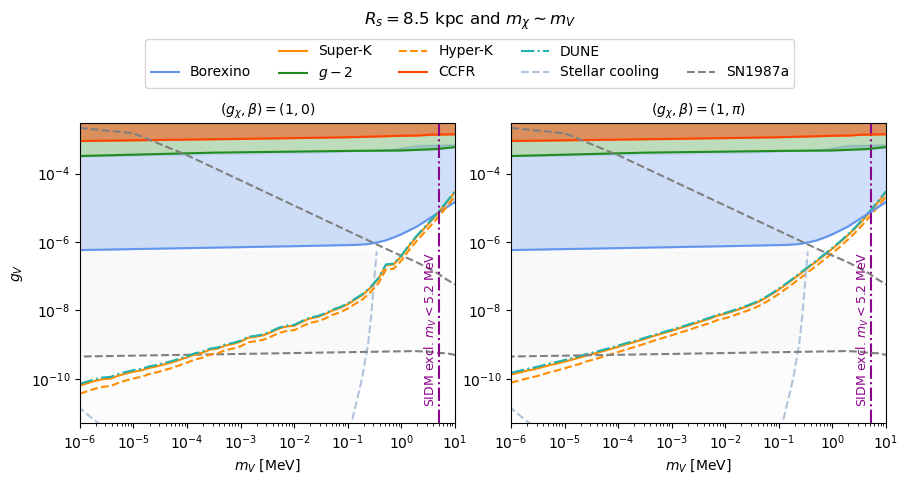

In [162]:
fig = plt.figure(figsize=(8*1.3,3*1.3))
fig.suptitle(r'$R_s=8.5$ kpc and $m_\chi\sim m_V$',y=1.17,fontsize=12)
gs = fig.add_gridspec(1, 2, hspace=0.3, wspace=0.15)
(ax1, ax2) = gs.subplots(sharex='col')
color = ['darkmagenta','','darkblue']
# Borexino
ax1.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino',color='cornflowerblue')
ax1.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
ax1.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$',color='forestgreen')
ax1.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
ax1.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR',color='orangered')
ax1.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='orangered')
# Stellar
ax1.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',label='Stellar cooling',color='lightsteelblue')
ax1.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
ax1.plot(SN_equal.T[0],SN_equal.T[1],'--',label='SN1987a',color='gray')
ax1.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')

# gD = 1
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps1Beta0_SK,NsSK,1),color='darkorange',label='Super-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps1Beta0_HK,NsHK,1),'--',color='darkorange',label='Hyper-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps1Beta0_DUNE,NsDUNE,1),'-.',color='lightseagreen',label='DUNE')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
ax1.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax1.text(0.5*mV_excl_gD1, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)


# show Rs
#ax1.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
ax1.set_xlim(1e-6,10)
ax1.set_ylim(5e-12,3e-3)
#ax1.legend(loc='upper left')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$m_V$ [MeV]')
ax1.set_ylabel(r'$g_V$')
ax1.set_title(r'$(g_\chi,\beta)=(1,0)$',fontsize=10)


# gD = 1
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps1BetaPi_SK,NsSK,1),color='darkorange',label='Super-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps1BetaPi_HK,NsHK,1),'--',color='darkorange',label='Hyper-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps1BetaPi_DUNE,NsDUNE,1),'-.',color='lightseagreen',label='DUNE')
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
ax2.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax2.text(0.5*mV_excl_gD1, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)

# Borexino
ax2.plot(Borexino_equal.T[0],Borexino_equal.T[1],color='cornflowerblue')
ax2.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
ax2.plot(gm2_equal.T[0],gm2_equal.T[1],color='forestgreen')
ax2.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
ax2.plot(CCFR_equal.T[0],CCFR_equal.T[1],color='orangered')
ax2.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='orangered')
# Stellar
ax2.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',color='lightsteelblue')
ax2.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
ax2.plot(SN_equal.T[0],SN_equal.T[1],'--',color='gray')
ax2.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
#ax2.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
ax2.set_xlim(1e-6,10)
ax2.set_ylim(5e-12,3e-3)
#ax2.legend(loc='upper left')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$m_V$ [MeV]')
#ax2.set_ylabel(r'$g_V$')
ax2.set_title(r'$(g_\chi,\beta)=(1,\pi)$',fontsize=10)
handles, labels = ax1.get_legend_handles_labels()
empty_entry= plt.plot([],[],color=(0,0,0,0))[0]
handle_order = [empty_entry,handles[0],handles[-3],handles[1],handles[-2],handles[2],handles[-1],handles[3],empty_entry,handles[4]]
label_order = ['',labels[0],labels[-3],labels[1],labels[-2],labels[2],labels[-1],labels[3],'',labels[4]]
fig.legend(handle_order, label_order, loc='lower center',ncols=5,bbox_to_anchor=(0.5, 0.97), borderaxespad=0)
plt.savefig('../plots/sensitivity_gx1_Txmin5MeV.pdf',bbox_inches = 'tight')

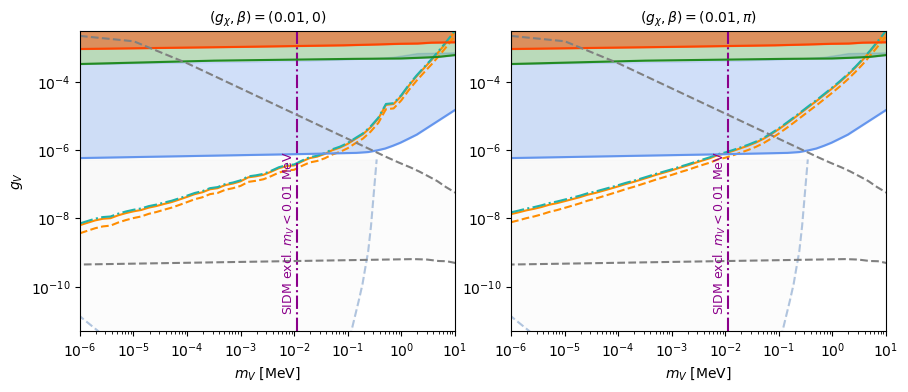

In [160]:
fig = plt.figure(figsize=(8*1.3,3*1.3))
#fig.suptitle(r'$g_\chi=1$')
gs = fig.add_gridspec(1, 2, hspace=0.3, wspace=0.15)
(ax1, ax2) = gs.subplots(sharex='col')
color = ['darkmagenta','','darkblue']
# gD = 0.01
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps1Beta0_SK,NsSK,0.01),color='darkorange')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps1Beta0_HK,NsHK,0.01),'--',color='darkorange')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps1Beta0_DUNE,NsDUNE,0.01),'-.',color='lightseagreen')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
ax1.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkmagenta')
ax1.text(0.5*mV_excl_gD001, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkmagenta',fontsize=9,rotation=90)

# Borexino
ax1.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino',color='cornflowerblue')
ax1.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
ax1.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$',color='forestgreen')
ax1.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
ax1.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR',color='orangered')
ax1.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='orangered')
# Stellar
ax1.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',label='Stellar cooling',color='lightsteelblue')
ax1.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
ax1.plot(SN_equal.T[0],SN_equal.T[1],'--',label='SN1987a',color='gray')
ax1.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
#ax1.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
ax1.set_xlim(1e-6,10)
ax1.set_ylim(5e-12,3e-3)
#ax1.legend(loc='upper left')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$m_V$ [MeV]')
ax1.set_ylabel(r'$g_V$')
ax1.set_title(r'$(g_\chi,\beta)=(0.01,0)$',fontsize=10)
#ax1.legend(loc='upper left')

# gD = 0.01
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps1BetaPi_SK,NsSK,0.01),color='darkorange',label='Super-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps1BetaPi_HK,NsHK,0.01),'--',color='darkorange',label='Hyper-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps1BetaPi_DUNE,NsDUNE,0.01),'-.',color='lightseagreen',label='DUNE')
# SIDM
#mV_excl_gD001 = mV_SIDM(0.01,10)
ax2.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkmagenta')
ax2.text(0.5*mV_excl_gD001, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkmagenta',fontsize=9,rotation=90)

# Borexino
ax2.plot(Borexino_equal.T[0],Borexino_equal.T[1],color='cornflowerblue')
ax2.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
ax2.plot(gm2_equal.T[0],gm2_equal.T[1],color='forestgreen')
ax2.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
ax2.plot(CCFR_equal.T[0],CCFR_equal.T[1],color='orangered')
ax2.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='orangered')
# Stellar
ax2.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',color='lightsteelblue')
ax2.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
ax2.plot(SN_equal.T[0],SN_equal.T[1],'--',color='gray')
ax2.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
#ax2.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
ax2.set_xlim(1e-6,10)
ax2.set_ylim(5e-12,3e-3)
#ax2.legend(loc='lower left')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$m_V$ [MeV]')
#ax2.set_ylabel(r'$g_V$')
ax2.set_title(r'$(g_\chi,\beta)=(0.01,\pi)$',fontsize=10)
plt.savefig('../plots/sensitivity_gx0.01_Txmin5MeV.pdf',bbox_inches = 'tight')

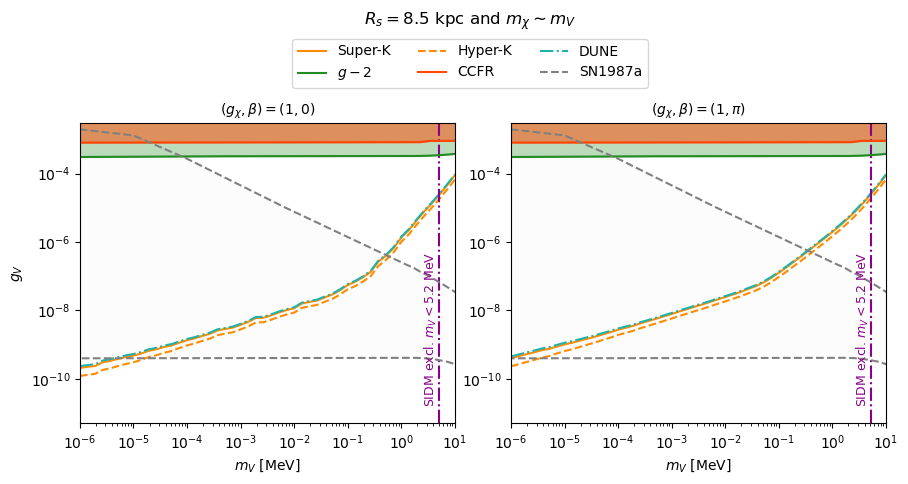

In [165]:
fig = plt.figure(figsize=(8*1.3,3*1.3))
gs = fig.add_gridspec(1, 2, hspace=0.3, wspace=0.15)
fig.suptitle(r'$R_s=8.5$ kpc and $m_\chi\sim m_V$',y=1.17,fontsize=12)
(ax1, ax2) = gs.subplots(sharex='col')

# gD=1
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps0Beta0_SK,NsSK,1),color='darkorange',label='Super-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps0Beta0_HK,NsHK,1),'--',color='darkorange',label='Hyper-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps0Beta0_DUNE,NsDUNE,1),'-.',color='lightseagreen',label='DUNE')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
ax1.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax1.text(0.5*mV_excl_gD1, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)

# g-2
ax1.plot(gm2_nokin.T[0],gm2_nokin.T[1],label='$g-2$',color='forestgreen')
ax1.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
ax1.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],label='CCFR',color='orangered')
ax1.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='orangered')
# SN
ax1.plot(SN_nokin.T[0],SN_nokin.T[1],'--',label='SN1987a',color='gray')
ax1.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
#ax1.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
ax1.set_xlim(1e-6,10)
ax1.set_ylim(5e-12,3e-3)
#ax1.legend(loc='upper left')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$m_V$ [MeV]')
ax1.set_ylabel(r'$g_V$')
ax1.set_title(r'$(g_\chi,\beta)=(1,0)$',fontsize=10)

ax2.plot(bdmMx,sensitivity_gV(bdmEventEps0BetaPi_SK,NsSK,1),color='darkorange',label='Super-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps0BetaPi_HK,NsHK,1),'--',color='darkorange',label='Hyper-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps0BetaPi_DUNE,NsDUNE,1),'-.',color='lightseagreen',label='DUNE')
# SIDM
#mV_excl_gD1 = mV_SIDM(1,10)
ax2.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax2.text(0.5*mV_excl_gD1, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)

# g-2
ax2.plot(gm2_nokin.T[0],gm2_nokin.T[1],color='forestgreen')
ax2.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
ax2.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],color='orangered')
ax2.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='orangered')
# SN
ax2.plot(SN_nokin.T[0],SN_nokin.T[1],'--',color='gray')
ax2.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
#ax2.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
ax2.set_xlim(1e-6,10)
ax2.set_ylim(5e-12,3e-3)
#ax2.legend(loc='upper left')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$m_V$ [MeV]')
ax2.set_title(r'$(g_\chi,\beta)=(1,\pi)$',fontsize=10)
handles, labels = ax1.get_legend_handles_labels()
#empty_entry= plt.plot([],[],color=(0,0,0,0))[0]
handle_order = [handles[0],handles[3],handles[1],handles[4],handles[2],handles[5]]
label_order = [labels[0],labels[3],labels[1],labels[4],labels[2],labels[5]]
#handle_order = [empty_entry,handles[0],handles[-3],handles[1],handles[-2],handles[2],handles[-1],handles[3],empty_entry,handles[4]]
#label_order = ['',labels[0],labels[-3],labels[1],labels[-2],labels[2],labels[-1],labels[3],'',labels[4]]
fig.legend(handle_order, label_order, loc='lower center',ncols=3,bbox_to_anchor=(0.5, 0.97), borderaxespad=0)
#ax2.set_ylabel(r'$g_V$')
#ax2.title(r'$\varepsilon=0$')
plt.savefig('../plots/sensitivity_gx1_noeps_Txmin5MeV.pdf',bbox_inches = 'tight')

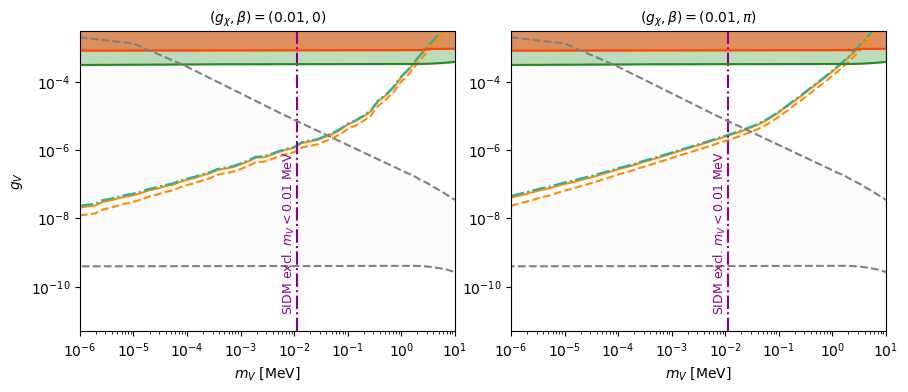

In [166]:
fig = plt.figure(figsize=(8*1.3,3*1.3))
gs = fig.add_gridspec(1, 2, hspace=0.3, wspace=0.15)
#fig.suptitle(r'$(m_\chi,T_\chi)=(0.1,10)\,{\rm MeV}~{\rm and}~R_s=8.5\,{\rm kpc}$')
(ax1, ax2) = gs.subplots(sharex='col')

# gD=0.01
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps0Beta0_SK,NsSK,0.01),color='darkorange')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps0Beta0_HK,NsHK,0.01),'--',color='darkorange')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax1.plot(bdmMx,sensitivity_gV(bdmEventEps0Beta0_DUNE,NsDUNE,0.01),'-.',color='lightseagreen')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
ax1.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkmagenta')
ax1.text(0.5*mV_excl_gD001, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkmagenta',fontsize=9,rotation=90)

# g-2
ax1.plot(gm2_nokin.T[0],gm2_nokin.T[1],label='$g-2$',color='forestgreen')
ax1.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
ax1.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],label='CCFR',color='orangered')
ax1.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='orangered')
# SN
ax1.plot(SN_nokin.T[0],SN_nokin.T[1],'--',label='SN1987a',color='gray')
ax1.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
#ax1.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
ax1.set_xlim(1e-6,10)
ax1.set_ylim(5e-12,3e-3)
#ax1.legend(loc='lower left')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$m_V$ [MeV]')
ax1.set_ylabel(r'$g_V$')
ax1.set_title(r'$(g_\chi,\beta)=(0.01,0)$',fontsize=10)

ax2.plot(bdmMx,sensitivity_gV(bdmEventEps0BetaPi_SK,NsSK,0.01),color='darkorange',label='Super-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps0BetaPi_HK,NsHK,0.01),'--',color='darkorange',label='Hyper-K')
#ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
ax2.plot(bdmMx,sensitivity_gV(bdmEventEps0BetaPi_DUNE,NsDUNE,0.01),'-.',color='lightseagreen',label='DUNE')
# SIDM
#mV_excl_gD1 = mV_SIDM(1,10)
ax2.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkmagenta')
ax2.text(0.5*mV_excl_gD001, 2e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkmagenta',fontsize=9,rotation=90)

# g-2
ax2.plot(gm2_nokin.T[0],gm2_nokin.T[1],color='forestgreen')
ax2.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
ax2.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],color='orangered')
ax2.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='orangered')
# SN
ax2.plot(SN_nokin.T[0],SN_nokin.T[1],'--',color='gray')
ax2.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
#ax2.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
ax2.set_xlim(1e-6,10)
ax2.set_ylim(5e-12,3e-3)
#ax2.legend(loc='lower left')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$m_V$ [MeV]')
ax2.set_title(r'$(g_\chi,\beta)=(0.01,\pi)$',fontsize=10)
#ax2.set_ylabel(r'$g_V$')
#ax2.title(r'$\varepsilon=0$')
plt.savefig('../plots/sensitivity_gx0.01_noeps_Txmin5MeV.pdf',bbox_inches = 'tight')

## Below is obsolete

In [2]:
def findmv(mx,gD,sigv=6e-26):
    kappa = 2*np.pi*sigv/lightSpeed/gD**4
    def _targetFunc(mV):
        return (mx**2 - mV**2)*np.sqrt(1 - mV**2/mx**2)/(mV**2 - 2*mx**2)**2*to_cm2 - kappa
    try:
        mV = root_scalar(_targetFunc,method='brentq',bracket=[0,mx]).root
    except:
        mV = 0
    return mV

In [281]:
findmv(1e-4,1,sigv=6e-26)

0.0001

In [3]:
def findgD(mx,r,sigv=6e-26):
    kappa = 2*np.pi*sigv/lightSpeed
    factor = (1 - r**2)**1.5/mx**2/(r**2 - 2)**2*to_cm2
    gD = (kappa/factor)**0.25
    #def _targetFunc(mV):
    #    return (mx**2 - mV**2)*np.sqrt(1 - mV**2/mx**2)/(mV**2 - 2*mx**2)**2 - kappa
    #try:
    #    mV = root_scalar(_targetFunc,method='brentq',bracket=[0,mx]).root
    #except:
    #    mV = 0
    return gD

In [286]:
gD_list = [1e-6,1e-4,1e-2,1]
mx_list = np.logspace(-6,1,200)
mV_list_gDm6 = []
mV_list_gDm4 = []
mV_list_gDm2 = []
mV_list_gD1 = []
for mx in mx_list:
    mV_list_gDm6.append(findmv(mx,1e-6))
    mV_list_gDm4.append(findmv(mx,1e-4))
    mV_list_gDm2.append(findmv(mx,1e-2))
    mV_list_gD1.append(findmv(mx,1))
mV_list_gDm6 = np.array(mV_list_gDm6)
mV_list_gDm4 = np.array(mV_list_gDm4)
mV_list_gDm2 = np.array(mV_list_gDm2)
mV_list_gD1 = np.array(mV_list_gD1)

Text(0.5, 1.0, '$\\langle \\sigma v\\rangle = 6\\times 10^{-23}~{\\rm cm^3~s^{-1}}$')

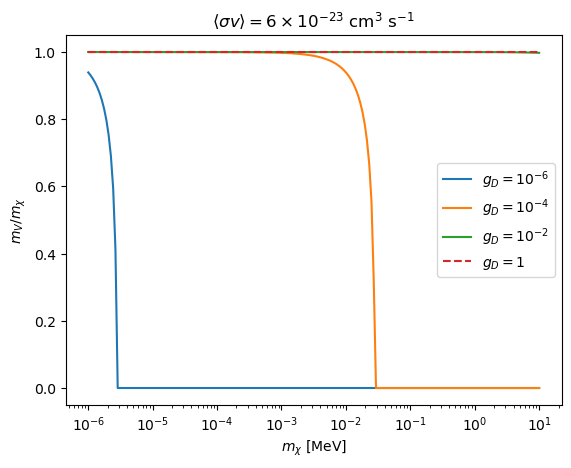

In [287]:
plt.plot(mx_list,mV_list_gDm6/mx_list,label=r'$g_D=10^{-6}$')
plt.plot(mx_list,mV_list_gDm4/mx_list,label=r'$g_D=10^{-4}$')
plt.plot(mx_list,mV_list_gDm2/mx_list,label=r'$g_D=10^{-2}$')
plt.plot(mx_list,mV_list_gD1/mx_list,'--',label=r'$g_D=1$')
plt.xscale('log')
plt.legend()
plt.xlabel(r'$m_\chi$ [MeV]')
plt.ylabel(r'$m_V/m_\chi$')
plt.title(r'$\langle \sigma v\rangle = 6\times 10^{-23}~{\rm cm^3~s^{-1}}$')
#plt.savefig('mV_over_mx.pdf',bbox_inches='tight')

In [113]:
r_list = [0.01,0.1,0.9]
mx_list = np.logspace(-6,2,100)
mV_list_r001 = []
mV_list_r01 = []
mV_list_r1 = []
for mx in mx_list:
    mV_list_r001.append(findgD(mx,0.01))
    mV_list_r01.append(findgD(mx,0.1))
    mV_list_r1.append(findgD(mx,1))
#mV_list_gDm6 = np.array(mV_list_gDm6)
#mV_list_gDm4 = np.array(mV_list_gDm4)
#mV_list_gDm2 = np.array(mV_list_gDm2)
#mV_list_gD1 = np.array(mV_list_gD1)

/var/folders/qf/n6502vwn5yz_j_q3fyn7nt140000gn/T/ipykernel_39890/3718989381.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  gD = (kappa/factor)**0.25


Text(0.5, 1.0, '$\\langle \\sigma v\\rangle = 6\\times 10^{-23}~{\\rm cm^3~s^{-1}}$')

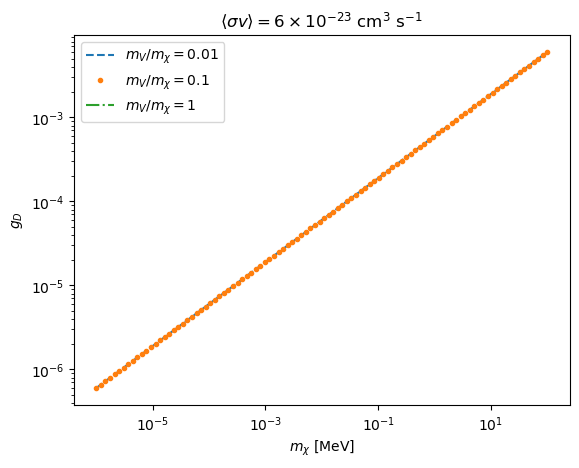

In [108]:
plt.plot(mx_list,mV_list_r001,'--',label=r'$m_V/m_\chi=0.01$')
plt.plot(mx_list,mV_list_r01,'.',label=r'$m_V/m_\chi=0.1$')
plt.plot(mx_list,mV_list_r1,'-.',label=r'$m_V/m_\chi=1$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel(r'$m_\chi$ [MeV]')
plt.ylabel(r'$g_D$')
plt.title(r'$\langle \sigma v\rangle = 6\times 10^{-23}~{\rm cm^3~s^{-1}}$')
#plt.savefig('gD_vs_mx.pdf',bbox_inches='tight')

In [100]:
annihilationCrossSectionDM2VV(1,0.9999999999,1)

5.25339495032107e-27

In [12]:
def annihilationCrossSectionDM2VV(mx,mV,gD):
    """
    Calculate the DM annihilation cross section to 2V, in terms of mV < mx
    and non-relativistic DM
    
    Input
    ------
    mx: DM mass, MeV
    mV: Mediator mass, MeV
    gD: DM-DM coupling constant
    
    Output
    ------
    scalar: annhilation cross section, cm^3 s^-1
    """
    if mV < mx:
        # Dark fine structure constant
        alphaX = gD**2/4/np.pi
        anncrox = 8*np.pi*alphaX**2*np.sqrt(1 - mV**2/mx**2)*(mx**2 - mV**2)/(mV**2 - 2*mx**2)**2
        return anncrox*to_cm2*lightSpeed
    raise ValueError('The cross section is for light mediator case, thus, mV should be smaller than mx')


def canonicalConstraint_gD(mx,mV,canonical_val = 3e-26):
    """
    Get the resulted gD to produce the thermal relic cross section for light
    mediator case
    
    Input
    ------
    mx: DM mass, MeV
    mV: Mediator mass, MeV
    canonical_val: Thermal relic cross section, default 3e-26 cm^3 s^-1
    
    Output
    ------
    scalar: The resulted gD, dimensionless
    """
    gD_4 = canonical_val/annihilationCrossSectionDM2VV(mx,mV,1)
    return gD_4**0.25


def canonicalConstraint_mV(mx,gD,canonical_val = 3e-26):
    """
    Get the resulted mV to produce the thermal relic cross section for light
    mediator case
    
    Input
    ------
    mx: DM mass, MeV
    gD: The DM-DM coupling constant
    canonical_val: Thermal relic cross section, default 3e-26 cm^3 s^-1
    
    Output
    ------
    scalar: The resulted mV, MeV
    """
    # Converted to natural unit
    sigv = canonical_val/lightSpeed/to_cm2
    # Dark fine structure constant
    alphaX = gD**2/4/np.pi
    return np.sqrt(-64*np.pi**2*alphaX**4/(mx*sigv)**2 + mx**2)


def sensitivity(b,cl=2):
    """
    Get the require event to obtain given confidence level for background b
    
    Input
    ------
    b: Background event
    cl: Confidence level, default 2
    
    Output
    ------
    scalar: The required event rate s
    """
    return cl*(cl + np.sqrt(4*b + cl**2))/2


def mV_SIDM(gD,eta=1):
    eta = eta/g2MeV/to_cm2
    return gD**(4/3)/(16*np.pi**2*eta)**(1/3)

In [4]:
to_cm2*lightSpeed

1.1670107952378819e-11

In [ ]:
"""
mx_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
Tx_list = [5,10,20,40]
Rs_list = [3,8.35,8.5,8.65,14]
beta_list = [0,0.25,0.5,1]
"""

In [5]:
#pathToFlux = '/Users/yenhsun/SNnuBDM_data/flux'
pathToFlux = '../data/BDM_flux'
pathToEventLightMv = '/Users/yenhsun/SNnuBDM_data/eventLightMediator'
pathToEventEqualMv = '/Users/yenhsun/SNnuBDM_data/eventEqualMediator'
pathToEventNoEps = '/Users/yenhsun/SNnuBDM_data/eventNoEps'
#flux_mx1.00e-01_Tx005_Rs3.00_beta0.00
#pathToFlux =  '/Users/yenhsun/Library/CloudStorage/GoogleDrive-yenhsun@phys.ncku.edu.tw/其他電腦/我的 iMac/SNnuBDM_data/SNnuBDM_data/flux'
#pathToEventLightMv = '/Users/yenhsun/Library/CloudStorage/GoogleDrive-yenhsun@phys.ncku.edu.tw/其他電腦/我的 iMac/SNnuBDM_data/SNnuBDM_data/eventLightMediator'
#pathToEventEqualMv = '/Users/yenhsun/Library/CloudStorage/GoogleDrive-yenhsun@phys.ncku.edu.tw/其他電腦/我的 iMac/SNnuBDM_data/SNnuBDM_data/eventEqualMediator'
#pathToEventNoEps = '/Users/yenhsun/Library/CloudStorage/GoogleDrive-yenhsun@phys.ncku.edu.tw/其他電腦/我的 iMac/SNnuBDM_data/SNnuBDM_data/eventNoEps'

In [6]:
mx = 0.1
Tx = 10
Rstar = [3,8.5,14]
beta1 = 0
beta2 = 0.25
beta3 = 0.5
beta4 = 1
flux_Rstar_beta1 = []
flux_Rstar_beta2 = []
flux_Rstar_beta3 = []
flux_Rstar_beta4 = []
for i in range(3):
    flux1 = np.loadtxt(pathToFlux + f'/flux_mx{mx}_Tx{Tx}_Rs{Rstar[i]}_beta{beta1:.2f}pi.txt',skiprows=1)
    flux2 = np.loadtxt(pathToFlux + f'/flux_mx{mx}_Tx{Tx}_Rs{Rstar[i]}_beta{beta2:.2f}pi.txt',skiprows=1)
    flux3 = np.loadtxt(pathToFlux + f'/flux_mx{mx}_Tx{Tx}_Rs{Rstar[i]}_beta{beta3:.2f}pi.txt',skiprows=1)
    flux4 = np.loadtxt(pathToFlux + f'/flux_mx{mx}_Tx{Tx}_Rs{Rstar[i]}_beta{beta4:.2f}pi.txt',skiprows=1)
    flux_Rstar_beta1.append(flux1)
    flux_Rstar_beta2.append(flux2)
    flux_Rstar_beta3.append(flux3)
    flux_Rstar_beta4.append(flux4)
flux_Rstar_beta1 = np.array(flux_Rstar_beta1)
flux_Rstar_beta2 = np.array(flux_Rstar_beta2)
flux_Rstar_beta3 = np.array(flux_Rstar_beta3)
flux_Rstar_beta4 = np.array(flux_Rstar_beta4)

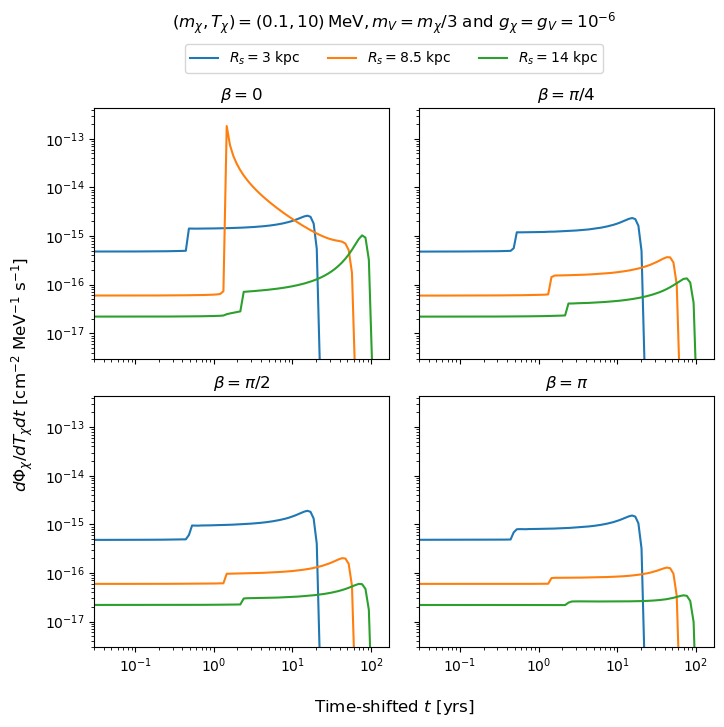

In [69]:
fig = plt.figure(figsize=(8,7))
gs = fig.add_gridspec(2, 2, hspace=1.5e-1, wspace=1e-1)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle(r'$(m_\chi,T_\chi)=(0.1,10)\,{\rm MeV},m_V=m_\chi/3$ and $g_\chi=g_V=10^{-6}$',y=1.02)
for i in range(3):
    ax1.plot(flux_Rstar_beta1[i,:,0]/yr2s,flux_Rstar_beta1[i,:,1],label=r'$R_s = $'+str(Rstar[i])+' kpc')
ax1.set_xlim(3e-2,170)
ax1.set_ylim(3e-18,4.3e-13)
ax1.set_title(r'$\beta=$' + f'{beta1}')
#ax1.legend(loc='upper right')
#ax1.text(0.18, 1e-14, r'$(m_\chi,T_\chi)=(0.1,10)$ MeV',fontsize=9,horizontalalignment='center')
#ax1.text(0.2, 5e-15, r'$g_\chi=g_V=10^{-6}$',fontsize=9,horizontalalignment='center')
for i in range(3):
    ax2.plot(flux_Rstar_beta2[i,:,0]/yr2s,flux_Rstar_beta2[i,:,1],label=r'$R_s = $'+str(Rstar[i])+' kpc')
ax2.set_xlim(3e-2,170)
ax2.set_title(r'$\beta=$' + f'$\pi/4$')
#ax2.legend()
for i in range(3):
    ax3.plot(flux_Rstar_beta3[i,:,0]/yr2s,flux_Rstar_beta3[i,:,1],label=r'$R_s = $'+str(Rstar[i])+' kpc')
ax3.set_ylim(3e-18,4.3e-13)
ax3.set_title(r'$\beta=$' + f'$\pi/2$')
#ax3.legend()
for i in range(3):
    ax4.plot(flux_Rstar_beta4[i,:,0]/yr2s,flux_Rstar_beta4[i,:,1],label=r'$R_s = $'+str(Rstar[i])+' kpc')
ax4.set_title(r'$\beta=$' + f'$\pi$')
#ax4.legend()
    # Dealing with axes
for i in range(1,5):
    # set both x and y axes into log-scale
    eval(f'ax{i}.set_xscale(\'log\')')
    eval(f'ax{i}.set_yscale(\'log\')')
# Set commom labels
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center',ncols=3,bbox_to_anchor=(0.5, 0.93), borderaxespad=0)
fig.supxlabel(r'Time-shifted $t$ [yrs]')
fig.supylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1}$ s$^{-1}$]')
fig.savefig('../plots/flux_mx100keV_md.pdf',bbox_inches='tight')

In [52]:
# BDM kinematics
Tx = 10
mx = 0.1
mV = mx
# Rstar
Rstar1 = 8.5
#Rstar2 = 17
#Rstar3 = 17
# Off-center angle
beta1 = 0
beta2 = np.pi/4
beta3 = np.pi/2
beta4 = np.pi
# Get the vanishing time and maximum theta_M
tvan1,thetaM1 = get_tvan_thetaM(Tx,mx,Rstar1)
#tvan2,thetaM2 = get_tvan_thetaM(Tx,mx,Rstar2)
#tvan3,thetaM3 = get_tvan_thetaM(Tx,mx,Rstar3)
time_ls1 = np.logspace(np.log10(5),np.log10(tvan1),200)
#time_ls2 = np.logspace(np.log10(5),np.log10(tvan2),200)
#time_ls3 = np.logspace(np.log10(5),np.log10(tvan3),200)
gV=1e-6
gD=1e-6
legacy = True
# setup function for ipyparallel
# the function is completely independent of this notebook
# everything required should be imported again within function body
def fluxToF(t,Tx,mx,mV,thetaM,Rstar,beta,gV,gD,legacy=False):
    # import necessary package
    import vegas
    import numpy as np
    integ = vegas.Integrator([[0, thetaM],[0,2*np.pi]])
    if beta == 0.0:
        neval = 30000
    else:
        neval = 2500
    if legacy is False:
        from supernovaNuBoostedDM import diffFluxAtEarth
        # body
        try:
            result = integ(lambda x: diffFluxAtEarth(t,Tx,mx,mV,Rstar,theta=x[0],phi=x[1],beta=beta,gV=gV,gD=gD),nitn=10,neval=neval).mean
        except:
            result = 0
    else:
        from bdmLegacy import diffFluxAtEarthLegacy
        # body
        try:
            result = integ(lambda x: diffFluxAtEarthLegacy(t,Tx,mx,Rstar,theta=x[0],phi=x[1],beta=beta,sigxv=1e-45),nitn=10,neval=neval).mean
        except:
            result = 0
    return result


# Setup ipyparallel
cpus = 6
with ipp.Cluster(n = cpus) as rc:
    # get a view on the cluster
    view = rc.load_balanced_view()
    # submit the tasks
    asyncresult1 = view.map_async(partial(fluxToF,Tx=Tx,mx=mx,mV=mV/3,thetaM=thetaM1,Rstar=Rstar1,beta=beta1,gV=gV,gD=gD,legacy=legacy), time_ls1.tolist())
    asyncresult2 = view.map_async(partial(fluxToF,Tx=Tx,mx=mx,mV=mV/3,thetaM=thetaM1,Rstar=Rstar1,beta=beta2,gV=gV,gD=gD,legacy=legacy), time_ls1.tolist())
    asyncresult3 = view.map_async(partial(fluxToF,Tx=Tx,mx=mx,mV=mV/3,thetaM=thetaM1,Rstar=Rstar1,beta=beta3,gV=gV,gD=gD,legacy=legacy), time_ls1.tolist())
    asyncresult4 = view.map_async(partial(fluxToF,Tx=Tx,mx=mx,mV=mV/3,thetaM=thetaM1,Rstar=Rstar1,beta=beta4,gV=gV,gD=gD,legacy=legacy), time_ls1.tolist())
    # wait interactively for results
    asyncresult1.wait_interactive()
    asyncresult2.wait_interactive()
    asyncresult3.wait_interactive()
    asyncresult4.wait_interactive()
    # retrieve actual results
    if legacy is False:
        bdmflux1 = asyncresult1.get()
        bdmflux2 = asyncresult2.get()
        bdmflux3 = asyncresult3.get()
        bdmflux4 = asyncresult4.get()
    else:
        bdmflux1_legacy = asyncresult1.get()
        bdmflux2_legacy = asyncresult2.get()
        bdmflux3_legacy = asyncresult3.get()
        bdmflux4_legacy = asyncresult4.get()

Starting 6 engines with <class 'ipyparallel.cluster.launcher.LocalEngineSetLauncher'>


  0%|          | 0/6 [00:00<?, ?engine/s]

functools.partial(<function fluxToF at 0x7f848a2b6d30>, Tx=10, mx=0.1, mV=0.03333333333333333, thetaM=0.140489…

engine set stopped 1678941020: {'engines': {'0': {'exit_code': 0, 'pid': 22326, 'identifier': '0'}, '1': {'exit_code': 0, 'pid': 22327, 'identifier': '1'}, '2': {'exit_code': 0, 'pid': 22328, 'identifier': '2'}, '3': {'exit_code': 0, 'pid': 22329, 'identifier': '3'}, '4': {'exit_code': 0, 'pid': 22330, 'identifier': '4'}, '5': {'exit_code': 0, 'pid': 22331, 'identifier': '5'}}, 'exit_code': 0}


functools.partial(<function fluxToF at 0x7f848a2b6d30>, Tx=10, mx=0.1, mV=0.03333333333333333, thetaM=0.140489…

functools.partial(<function fluxToF at 0x7f848a2b6d30>, Tx=10, mx=0.1, mV=0.03333333333333333, thetaM=0.140489…

functools.partial(<function fluxToF at 0x7f848a2b6d30>, Tx=10, mx=0.1, mV=0.03333333333333333, thetaM=0.140489…

Stopping engine(s): 1678941083
engine set stopped 1678941083: {'engines': {'0': {'exit_code': 0, 'pid': 22390, 'identifier': '0'}, '1': {'exit_code': 0, 'pid': 22391, 'identifier': '1'}, '2': {'exit_code': 0, 'pid': 22392, 'identifier': '2'}, '3': {'exit_code': 0, 'pid': 22393, 'identifier': '3'}, '4': {'exit_code': 0, 'pid': 22394, 'identifier': '4'}, '5': {'exit_code': 0, 'pid': 22395, 'identifier': '5'}}, 'exit_code': 0}
Stopping controller
Controller stopped: {'exit_code': 0, 'pid': 22378, 'identifier': 'ipcontroller-1678941082-ca7z-19748'}


In [291]:
mx = 1e-1
Tx = [5,10,20,40]
beta1 = 0
beta2 = 0.25
beta3 = 0.5
beta4 = 1
flux_Rstar_Tx1 = []
flux_Rstar_Tx2 = []
flux_Rstar_Tx3 = []
flux_Rstar_Tx4 = []
for i in range(4):
    flux1 = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx[i]:0{3}d}_Rs{Rstar[1]:.2f}_beta{beta1:.2f}.txt',skiprows=1)
    flux2 = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx[i]:0{3}d}_Rs{Rstar[1]:.2f}_beta{beta2:.2f}.txt',skiprows=1)
    flux3 = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx[i]:0{3}d}_Rs{Rstar[1]:.2f}_beta{beta3:.2f}.txt',skiprows=1)
    flux4 = np.loadtxt(pathToFlux + f'/flux_mx{mx:.2e}_Tx{Tx[i]:0{3}d}_Rs{Rstar[1]:.2f}_beta{beta4:.2f}.txt',skiprows=1)
    flux_Rstar_Tx1.append(flux1)
    flux_Rstar_Tx2.append(flux2)
    flux_Rstar_Tx3.append(flux3)
    flux_Rstar_Tx4.append(flux4)
flux_Rstar_Tx1 = np.array(flux_Rstar_Tx1)
flux_Rstar_Tx2 = np.array(flux_Rstar_Tx2)
flux_Rstar_Tx3 = np.array(flux_Rstar_Tx3)
flux_Rstar_Tx4 = np.array(flux_Rstar_Tx4)

Text(0.02, 0.5, '$d\\Phi_\\chi/dT_\\chi dt$ [cm$^{-2}$ MeV$^{-1}$ s$^{-1}$]')

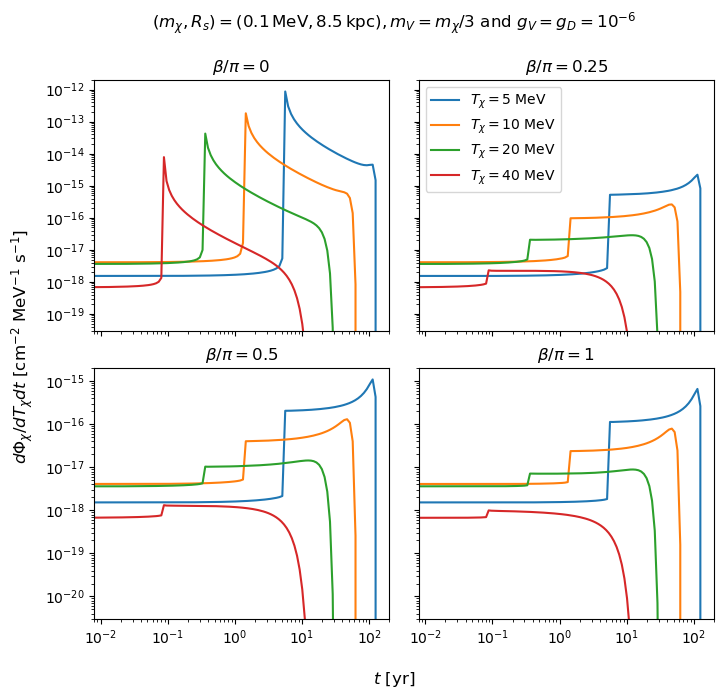

In [312]:
fig = plt.figure(figsize=(8,7))
gs = fig.add_gridspec(2, 2, hspace=1.5e-1, wspace=1e-1)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle(r'$(m_\chi,R_s)=(0.1\,{\rm MeV},8.5\,{\rm kpc}),m_V=m_\chi/3$ and $g_V=g_D=10^{-6}$')
for i in range(4):
    ax1.plot(flux_Rstar_Tx1[i,:,0]/yr2s,flux_Rstar_Tx1[i,:,1],label=r'$T_\chi = $'+str(Tx[i])+' MeV')
ax1.set_xlim(8e-3,200)
ax1.set_ylim(3e-20,2e-12)
ax1.set_title(r'$\beta/\pi=$' + f'{beta1}')
for i in range(4):
    ax2.plot(flux_Rstar_Tx2[i,:,0]/yr2s,flux_Rstar_Tx2[i,:,1],label=r'$T_\chi = $'+str(Tx[i])+' MeV')
ax2.set_xlim(8e-3,200)
ax2.set_title(r'$\beta/\pi=$' + f'{beta2}')
ax2.legend()
for i in range(4):
    ax3.plot(flux_Rstar_Tx3[i,:,0]/yr2s,flux_Rstar_Tx3[i,:,1],label=r'$T_\chi = $'+str(Tx[i])+' MeV')
ax3.set_ylim(3e-21,2e-15)
ax3.set_title(r'$\beta/\pi=$' + f'{beta3}')
for i in range(4):
    ax4.plot(flux_Rstar_Tx4[i,:,0]/yr2s,flux_Rstar_Tx4[i,:,1],label=r'$T_\chi = $'+str(Tx[i])+' MeV')
ax4.set_title(r'$\beta/\pi=$' + f'{beta4}')
    # Dealing with axes
for i in range(1,5):
    # set both x and y axes into log-scale
    eval(f'ax{i}.set_xscale(\'log\')')
    eval(f'ax{i}.set_yscale(\'log\')')
# Set commom labels
fig.supxlabel(r'$t$ [yr]')
fig.supylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1}$ s$^{-1}$]')
#fig.savefig('flux_vs_Tx.pdf',bbox_inches='tight')

(0.0003, 27.26241264262081)

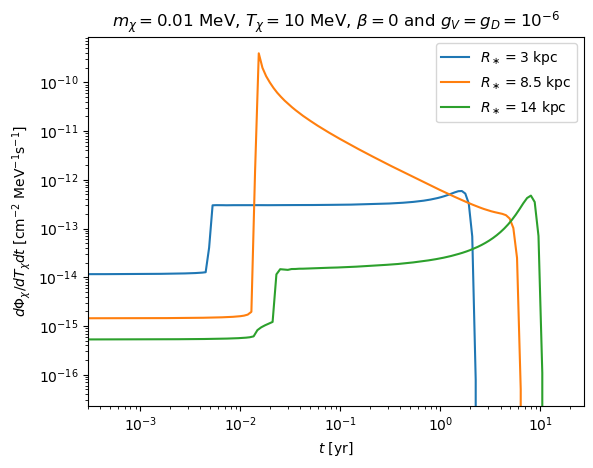

In [36]:
for i in range(3):
    plt.plot(flux_Rstar_beta1[i,:,0]/yr2s,flux_Rstar_beta1[i,:,1],label=r'$R_\ast = $'+str(Rstar[i])+' kpc')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [yr]')
plt.ylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1} $s$^{-1}$]')
plt.title(r'$m_\chi=$' + str(mx) + r' MeV, $T_\chi=$' + str(Tx) + r' MeV, $\beta=0~{\rm and}~g_V=g_D=10^{-6}$')
plt.legend()
plt.xlim(3e-4,)
#plt.ylim(5e-17,3e-9)
#plt.savefig('flux_v_Rs.pdf',bbox_inches='tight')

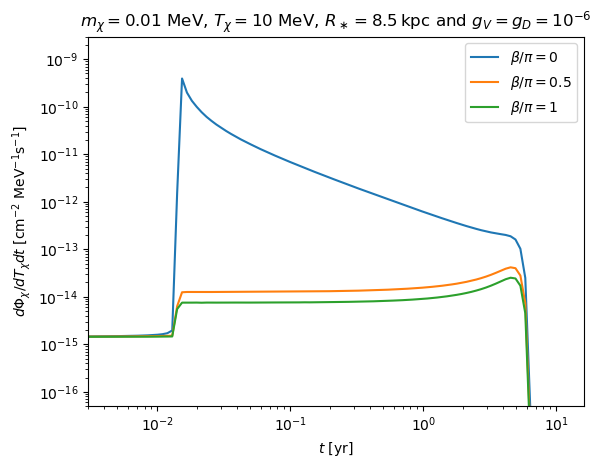

In [52]:
for i in range(3):
    plt.plot(flux_beta[i,:,0]/yr2s,flux_beta[i,:,1],label=r'$\beta/\pi = $'+str(beta[i]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [yr]')
plt.ylabel(r'$d\Phi_\chi/dT_\chi dt$ [cm$^{-2}$ MeV$^{-1} $s$^{-1}$]')
plt.title(r'$m_\chi=$' + str(mx) + r' MeV, $T_\chi=$' + str(Tx) + r' MeV, $R_\ast=8.5\,{\rm kpc~and}~g_V=g_D=10^{-6}$')
plt.legend()
plt.xlim(3e-3,)
plt.ylim(5e-17,3e-9)
#plt.savefig('flux_v_beta.pdf',bbox_inches='tight')

In [56]:
# Physical properties
Rstar = [5,8.5,13]
beta1 = 0
beta2 = 0.5
beta3 = 1
NeSK = 7.473e33 # SK total electron number
gV = 1 #1e-5
gD = 1 #1e-2
eps = 1 # 1e-5
totalEffect = NeSK*gV**2*gD**4*eps**2 # Effects from coupling constants and detector electron number
# Load event
eventLight_beta1 = []
eventLight_beta2 = []
eventLight_beta3 = []
eventEqual_beta4 = []
# no eps
#eventLightNoEps_beta = []
#eventEqualNoEps_beta = []
for i in range(3):    
    eventLight1 = np.loadtxt(pathToEventLightMv + f'/eventPerElectron_Rs{Rstar[i]:.2f}_beta{beta1:.2f}.txt',skiprows=1)
    eventLight2 = np.loadtxt(pathToEventLightMv + f'/eventPerElectron_Rs{Rstar[i]:.2f}_beta{beta2:.2f}.txt',skiprows=1)
    eventLight3 = np.loadtxt(pathToEventLightMv + f'/eventPerElectron_Rs{Rstar[i]:.2f}_beta{beta3:.2f}.txt',skiprows=1)
    #eventLight4 = np.loadtxt(pathToEventLightMv + f'/eventPerElectron_Rs{Rstar[i]:.2f}_beta{beta4:.2f}.txt',skiprows=1)
    #eventEqual = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_Rs{Rstar:.2f}_beta{beta[i]:.2f}.txt',skiprows=1)
    # no eps
    #eventLightNoEps = np.loadtxt(pathToEventNoEps + f'/eventPerElectron_lightMv_noEps_Rs{Rstar:.2f}_beta{beta[i]:.2f}.txt',skiprows=1)
    #eventEqualNoEps = np.loadtxt(pathToEventNoEps + f'/eventPerElectron_equalMv_noEps_Rs{Rstar:.2f}_beta{beta[i]:.2f}.txt',skiprows=1)
    # event number times the total effect
    eventLight1[:,1] = eventLight1[:,1]*totalEffect
    eventLight2[:,1] = eventLight2[:,1]*totalEffect 
    eventLight3[:,1] = eventLight3[:,1]*totalEffect 
    #eventLight4[:,1] = eventLight4[:,1]*totalEffect 
    #eventEqual[:,1] = eventEqual[:,1]*totalEffect
    # no eps
    #eventLightNoEps[:,1] = eventLightNoEps[:,1]*totalEffect 
    #eventEqualNoEps[:,1] = eventEqualNoEps[:,1]*totalEffect 
    # append
    eventLight_beta1.append(eventLight1)
    eventLight_beta2.append(eventLight2)
    eventLight_beta3.append(eventLight3)
    #eventLight_beta4.append(eventLight4)
    #eventEqual_beta.append(eventEqual)
    # append no eps
    #eventLightNoEps_beta.append(eventLightNoEps)
    #eventEqualNoEps_beta.append(eventEqualNoEps)
eventLight_beta1 = np.array(eventLight_beta1)
eventLight_beta2 = np.array(eventLight_beta2)
eventLight_beta3 = np.array(eventLight_beta3)
#eventEqual_beta = np.array(eventEqual_beta)
#eventLightNoEps_beta = np.array(eventLightNoEps_beta)
#eventEqualNoEps_beta = np.array(eventEqualNoEps_beta)

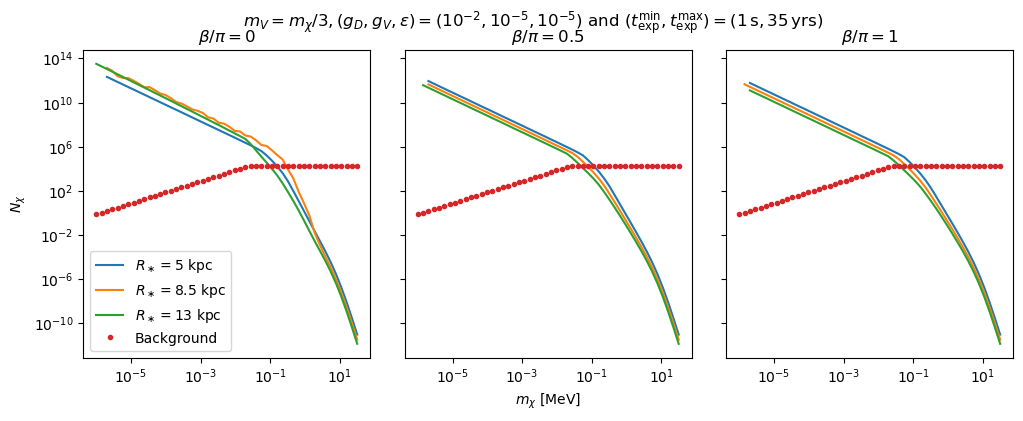

In [202]:
fig = plt.figure(figsize=(12,4))
gs = fig.add_gridspec(1, 3,wspace=1.2e-1,hspace=5e-1)
(ax1, ax2, ax3) = gs.subplots( sharey='row' ,sharex='col')
fig.suptitle(r'$m_V=m_\chi/3,(g_D,g_V,\epsilon)=(10^{-2},10^{-5},10^{-5})$ and $(t_{\rm exp}^{\rm min},t_{\rm exp}^{\rm max})=(1\,{\rm s},35\,{\rm yrs})$')
for i in range(3):
    ax1.plot(eventLight_beta1[i,:,0],eventLight_beta1[i,:,1],label=r'$R_\ast = $'+str(Rstar[i])+' kpc')
ax1.plot(mx_list,backgroundSK,'.',label='Background')
ax1.legend(loc='lower left')
ax1.set_ylabel(r'$N_\chi$')
ax1.set_title(r'$\beta/\pi=$' + f'{beta1}')
#ax1.set_ylim(3e-9)
for i in range(3):
    ax2.plot(eventLight_beta2[i,:,0],eventLight_beta2[i,:,1],label=r'$R_\ast = $'+str(Rstar[i])+' kpc')
ax2.plot(mx_list,backgroundSK,'.',label='Background')
ax2.set_xlabel(r'$m_\chi$ [MeV]')
ax2.set_title(r'$\beta/\pi=$' + f'{beta2}')
for i in range(3):
    ax3.plot(eventLight_beta3[i,:,0],eventLight_beta3[i,:,1],label=r'$R_\ast = $'+str(Rstar[i])+' kpc')
ax3.plot(mx_list,backgroundSK,'.',label='Background')
ax3.set_title(r'$\beta/\pi=$' + f'{beta3}')
    # Dealing with axes
for i in range(1,5):
    # set both x and y axes into log-scale
    eval(f'ax{i}.set_xscale(\'log\')')
    eval(f'ax{i}.set_yscale(\'log\')')
# Set commom labels
#fig.supxlabel(r'$m_\chi$ [MeV]')
#fig.supylabel(r'$N_\chi$')
#fig.savefig('event_multiple_set.pdf',bbox_inches='tight')

In [57]:
# Physical properties
Rstar = [5,8.5,13]
beta1 = 0
beta2 = 0.5
beta3 = 1
NeSK = 7.473e33 # SK total electron number
gV = 1 #1e-5
gD = 1 #1e-2
eps = 1 # 1e-5
efficiency = 0.5
totalEffect = NeSK*gV**2*gD**4*eps**2*efficiency # Effects from coupling constants and detector electron number
# Load event
eventEqual_beta1_list = []
eventEqual_beta2_list = []
eventEqual_beta3_list = []
# no eps
eventEqualNoEps_beta1_list = []
eventEqualNoEps_beta2_list = []
eventEqualNoEps_beta3_list = []
for i in range(3):    
    # w/ eps
    eventEqual_beta1 = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_Rs{Rstar[i]:.2f}_beta{beta1:.2f}.txt',skiprows=1)
    eventEqual_beta2 = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_Rs{Rstar[i]:.2f}_beta{beta2:.2f}.txt',skiprows=1)
    eventEqual_beta3 = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_Rs{Rstar[i]:.2f}_beta{beta3:.2f}.txt',skiprows=1)
    
    eventEqual_beta1[:,1] = eventEqual_beta1[:,1]*totalEffect
    eventEqual_beta2[:,1] = eventEqual_beta2[:,1]*totalEffect
    eventEqual_beta3[:,1] = eventEqual_beta3[:,1]*totalEffect
    
    # no eps
    eventEqualNoEps_beta1 = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_equalMv_noEps_Rs{Rstar[i]:.2f}_beta{beta1:.2f}.txt',skiprows=1)
    eventEqualNoEps_beta2 = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_equalMv_noEps_Rs{Rstar[i]:.2f}_beta{beta2:.2f}.txt',skiprows=1)
    eventEqualNoEps_beta3 = np.loadtxt(pathToEventEqualMv + f'/eventPerElectron_equalMv_noEps_Rs{Rstar[i]:.2f}_beta{beta3:.2f}.txt',skiprows=1)
    
    eventEqualNoEps_beta1[:,1] = eventEqualNoEps_beta1[:,1]*totalEffect
    eventEqualNoEps_beta2[:,1] = eventEqualNoEps_beta2[:,1]*totalEffect
    eventEqualNoEps_beta3[:,1] = eventEqualNoEps_beta3[:,1]*totalEffect
    # append
    # w/ eps
    eventEqual_beta1_list.append(eventEqual_beta1)
    eventEqual_beta2_list.append(eventEqual_beta2)
    eventEqual_beta3_list.append(eventEqual_beta3)
    # no eps
    eventEqualNoEps_beta1_list.append(eventEqualNoEps_beta1)
    eventEqualNoEps_beta2_list.append(eventEqualNoEps_beta2)
    eventEqualNoEps_beta3_list.append(eventEqualNoEps_beta3)
    
eventEqual_beta1_list = np.array(eventEqual_beta1_list)
eventEqual_beta2_list = np.array(eventEqual_beta2_list)   
eventEqual_beta3_list = np.array(eventEqual_beta3_list)

eventEqualNoEps_beta1_list = np.array(eventEqualNoEps_beta1_list)
eventEqualNoEps_beta2_list = np.array(eventEqualNoEps_beta2_list)   
eventEqualNoEps_beta3_list = np.array(eventEqualNoEps_beta3_list)   

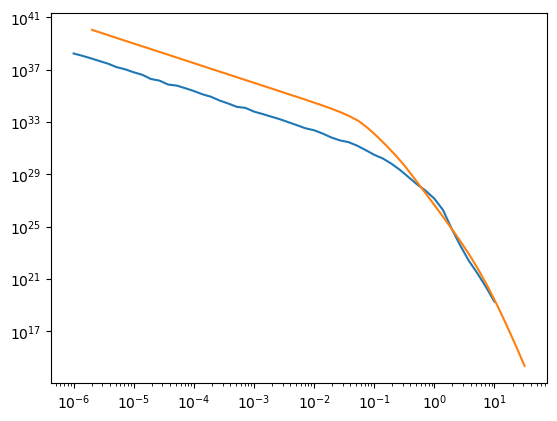

In [65]:
plt.plot(bdmMx,bdmEventEps1Beta0_SK)
plt.plot(eventEqual_beta1_list[0][:,0],eventEqual_beta1_list[0][:,1])
#plt.ylim(1e35,1e41)
plt.xscale('log')
plt.yscale('log')

In [59]:
bdmEventEps1Beta0_SK

array([1.67172236e+38, 1.12076327e+38, 7.20732199e+37, 4.46083990e+37,
       2.80699716e+37, 1.52687975e+37, 1.03922159e+37, 6.14465643e+36,
       3.93551367e+36, 1.88721379e+36, 1.41861445e+36, 7.14066771e+35,
       5.93720567e+35, 3.74228701e+35, 2.28152353e+35, 1.28736212e+35,
       8.29257660e+34, 4.27493902e+34, 2.53624547e+34, 1.41380184e+34,
       1.17760071e+34, 6.13523757e+33, 4.01732804e+33, 2.53097592e+33,
       1.61749390e+33, 9.50177250e+32, 5.61236555e+32, 3.24529843e+32,
       2.29733218e+32, 1.28445097e+32, 6.48240142e+31, 3.87754125e+31,
       2.85356819e+31, 1.54242308e+31, 7.03365531e+30, 3.06171173e+30,
       1.60423527e+30, 6.42035339e+29, 2.14895934e+29, 5.96478421e+28,
       1.66427866e+28, 5.46287984e+27, 1.37177073e+27, 1.89440691e+26,
       7.27550923e+24, 3.84433203e+23, 2.57496008e+22, 2.80502937e+21,
       2.52185923e+20, 1.83586700e+19])

In [25]:
# Background
texpMax = 35*yr2s # maximum exposure time
obsSK =  526.314 # observed in SK per year, whole sky
backgroundSK_Rstar = []
# Get the list for DM mass
mx_list = bdmMx
for i in [8.5]:
    background_this_Rs = []
    for mx in mx_list:
        # the associated tvan
        tvan,_ = get_tvan_thetaM(5,mx,i)
        if tvan <= texpMax:
            texp = tvan
        else:
            texp = texpMax
        bkgSK = obsSK*(texp - 10)/yr2s
        background_this_Rs.append(bkgSK)
    backgroundSK_Rstar.append(background_this_Rs)
backgroundSK_Rstar = np.array(backgroundSK_Rstar)

In [26]:
backgroundSK_Rstar

array([[7.29890625e-01, 1.01424802e+00, 1.40935512e+00, 1.95835832e+00,
        2.72118802e+00, 3.78114372e+00, 5.25395403e+00, 7.30040663e+00,
        1.01439790e+01, 1.40950471e+01, 1.95850735e+01, 2.72133594e+01,
        3.78128952e+01, 5.25409573e+01, 7.30054041e+01, 1.01440975e+02,
        1.40951361e+02, 1.95851055e+02, 2.72132814e+02, 3.78126047e+02,
        5.25402567e+02, 7.30039118e+02, 1.01437954e+03, 1.40945389e+03,
        1.95839385e+03, 2.72110145e+03, 3.78082143e+03, 5.25317672e+03,
        7.29875095e+03, 1.01406279e+04, 1.40884238e+04, 1.84209898e+04,
        1.84209898e+04, 1.84209898e+04, 1.84209898e+04, 1.84209898e+04,
        1.84209898e+04, 1.84209898e+04, 1.84209898e+04, 1.84209898e+04,
        1.84209898e+04, 1.84209898e+04, 1.84209898e+04, 1.84209898e+04,
        1.84209898e+04, 1.84209898e+04, 1.84209898e+04, 1.84209898e+04,
        1.84209898e+04, 1.84209898e+04]])

In [38]:
atmEvent*NeSK

array([1.07483343e-06, 1.49347891e-06, 2.07518564e-06, 2.88346091e-06,
       4.00655310e-06, 5.56708427e-06, 7.73540460e-06, 1.07483343e-05,
       1.49347891e-05, 2.07518564e-05, 2.88346091e-05, 4.00655310e-05,
       5.56708427e-05, 7.73540460e-05, 1.07483343e-04, 1.49347891e-04,
       2.07517827e-04, 2.88345354e-04, 4.00654573e-04, 5.56706953e-04,
       7.73540460e-04, 1.07483343e-03, 1.49347154e-03, 2.07516353e-03,
       2.88341669e-03, 4.00647940e-03, 5.56694424e-03, 7.73518350e-03,
       1.07478184e-02, 1.49337573e-02, 2.07497928e-02, 2.88307030e-02,
       4.00580873e-02, 5.56564712e-02, 7.73267770e-02, 1.07429542e-01,
       1.35602841e-01, 1.35602841e-01, 1.35602841e-01, 1.35602841e-01,
       1.35602841e-01, 1.35602841e-01, 1.35602841e-01, 1.35602841e-01,
       5.26055123e-01, 5.26055123e-01, 5.26055123e-01, 5.26055123e-01,
       5.26055123e-01, 1.12426402e+00])

array([[  5.13673795,   5.48051492,   5.9083041 ,   6.43473411,
          7.07636722,   7.85227731,   8.78466154,   9.89957297,
         11.22777504,  12.80557158,  14.67598468,  16.88982456,
         19.50723169,  22.599215  ,  26.24960274,  30.5574474 ,
         35.63942462,  41.63342575,  48.70184698,  57.03642773,
         66.86309073,  78.44810621,  92.10569538, 108.20560772,
        127.18446699, 149.55613022, 175.92691413, 207.01076492,
        243.64852085, 286.83156998, 337.72517111, 385.89050348,
        385.89050348, 385.89050348, 385.89050348, 385.89050348,
        385.89050348, 385.89050348, 385.89050348, 385.89050348,
        385.89050348, 385.89050348, 385.89050348, 385.89050348,
        385.89050348, 385.89050348, 385.89050348, 385.89050348,
        385.89050348, 385.89050348]])

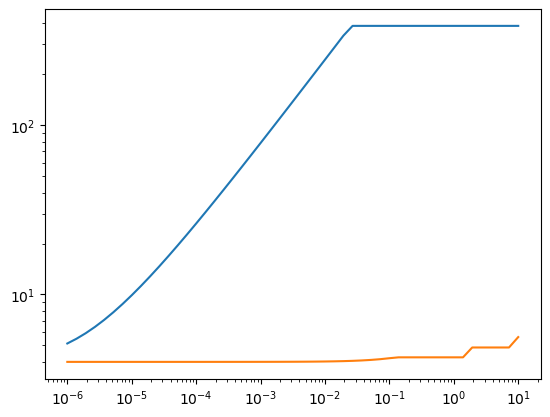

In [45]:
plt.plot(bdmMx,sensitivity(backgroundSK_Rstar)[0])
plt.plot(bdmMx,sensitivity(atmEvent*NeSK))
plt.xscale('log')
plt.yscale('log')

In [10]:
# Load constraints
# w/ kinetic mixing
SN_equal = 10**np.loadtxt('../data/constraints/SN1987_eps1.txt',delimiter=',') # SN equal eps and gz
CCFR_equal = 10**np.loadtxt('../data/constraints/CCFR_eps1.txt',delimiter=',') # CCFR equal eps and gz
Borexino_equal = 10**np.loadtxt('../data/constraints/Borexino_eps1.txt',delimiter=',') # Borexino equal eps and gz
StarCool_equal = 10**np.loadtxt('../data/constraints/StellarCooling_eps1.txt',delimiter=',') # Stellar cooling equal eps and gz
gm2_equal = 10**np.loadtxt('../data/constraints/g-2_eps1.txt',delimiter=',') # g-2 equal eps and gz
# no kinetic mixing
SN_nokin = 10**np.loadtxt('../data/constraints/SN1987_eps0.txt',delimiter=',') # SN no eps
CCFR_nokin = 10**np.loadtxt('../data/constraints/CCFR_eps0.txt',delimiter=',') # CCFR no eps
gm2_nokin = 10**np.loadtxt('../data/constraints/g-2_eps0.txt',delimiter=',') # g-2 no eps

In [13]:
# Constraint gV with gD = 1
gV_EqualMv_constraint_gD1_beta1 = []
gV_EqualMv_constraint_gD1_beta2 = []
gV_EqualMv_constraint_gD1_beta3 = []

for i in range(len(Rstar)):
    #gV_LightMv_constraint = []
    gV_EqualMv_constraint1 = []
    gV_EqualMv_constraint2 = []
    gV_EqualMv_constraint3 = []
    for j in range(len(mx_list)):
        # background
        b = backgroundSK_Rstar[i][j]
        # required s
        s = sensitivity(b)
        # constraint on gV, assuming gV = eps
        gV_Equal_required1 = (s/eventEqual_beta1_list[:,:,1][i,j])**0.25
        gV_Equal_required2 = (s/eventEqual_beta2_list[:,:,1][i,j])**0.25
        gV_Equal_required3 = (s/eventEqual_beta3_list[:,:,1][i,j])**0.25
        gV_EqualMv_constraint1.append(gV_Equal_required1)
        gV_EqualMv_constraint2.append(gV_Equal_required2)
        gV_EqualMv_constraint3.append(gV_Equal_required3)
    gV_EqualMv_constraint_gD1_beta1.append(gV_EqualMv_constraint1)
    gV_EqualMv_constraint_gD1_beta2.append(gV_EqualMv_constraint2)
    gV_EqualMv_constraint_gD1_beta3.append(gV_EqualMv_constraint3)

    #gV_LightMv_constraint_beta = np.array(gV_LightMv_constraint_beta)
gV_EqualMv_constraint_gD1_beta1 = np.array(gV_EqualMv_constraint_gD1_beta1)
gV_EqualMv_constraint_gD1_beta2 = np.array(gV_EqualMv_constraint_gD1_beta2)
gV_EqualMv_constraint_gD1_beta3 = np.array(gV_EqualMv_constraint_gD1_beta3)

# Constraint gV with gD = 0.1
gV_EqualMv_constraint_gD01_beta1 = []
gV_EqualMv_constraint_gD01_beta2 = []
gV_EqualMv_constraint_gD01_beta3 = []

for i in range(len(Rstar)):
    #gV_LightMv_constraint = []
    gV_EqualMv_constraint1 = []
    gV_EqualMv_constraint2 = []
    gV_EqualMv_constraint3 = []
    for j in range(len(mx_list)):
        # background
        b = backgroundSK_Rstar[i][j]
        # required s
        s = sensitivity(b)
        # constraint on gV, assuming gV = eps
        gV_Equal_required1 = (s/eventEqual_beta1_list[:,:,1][i,j]/0.1**4)**0.25
        gV_Equal_required2 = (s/eventEqual_beta2_list[:,:,1][i,j]/0.1**4)**0.25
        gV_Equal_required3 = (s/eventEqual_beta3_list[:,:,1][i,j]/0.1**4)**0.25
        gV_EqualMv_constraint1.append(gV_Equal_required1)
        gV_EqualMv_constraint2.append(gV_Equal_required2)
        gV_EqualMv_constraint3.append(gV_Equal_required3)
    gV_EqualMv_constraint_gD01_beta1.append(gV_EqualMv_constraint1)
    gV_EqualMv_constraint_gD01_beta2.append(gV_EqualMv_constraint2)
    gV_EqualMv_constraint_gD01_beta3.append(gV_EqualMv_constraint3)

    #gV_LightMv_constraint_beta = np.array(gV_LightMv_constraint_beta)
gV_EqualMv_constraint_gD01_beta1 = np.array(gV_EqualMv_constraint_gD01_beta1)
gV_EqualMv_constraint_gD01_beta2 = np.array(gV_EqualMv_constraint_gD01_beta2)
gV_EqualMv_constraint_gD01_beta3 = np.array(gV_EqualMv_constraint_gD01_beta3)


# Constraint gV with gD = 0.01 no eps
gV_EqualMv_constraint_gD001_beta1 = []
gV_EqualMv_constraint_gD001_beta2 = []
gV_EqualMv_constraint_gD001_beta3 = []

for i in range(len(Rstar)):
    #gV_LightMv_constraint = []
    gV_EqualMv_constraint1 = []
    gV_EqualMv_constraint2 = []
    gV_EqualMv_constraint3 = []
    for j in range(len(mx_list)):
        # background
        b = backgroundSK_Rstar[i][j]
        # required s
        s = sensitivity(b)
        # constraint on gV, assuming gV = eps
        gV_Equal_required1 = (s/eventEqual_beta1_list[:,:,1][i,j]/0.01**4)**0.25
        gV_Equal_required2 = (s/eventEqual_beta2_list[:,:,1][i,j]/0.01**4)**0.25
        gV_Equal_required3 = (s/eventEqual_beta3_list[:,:,1][i,j]/0.01**4)**0.25
        gV_EqualMv_constraint1.append(gV_Equal_required1)
        gV_EqualMv_constraint2.append(gV_Equal_required2)
        gV_EqualMv_constraint3.append(gV_Equal_required3)
    gV_EqualMv_constraint_gD001_beta1.append(gV_EqualMv_constraint1)
    gV_EqualMv_constraint_gD001_beta2.append(gV_EqualMv_constraint2)
    gV_EqualMv_constraint_gD001_beta3.append(gV_EqualMv_constraint3)

    #gV_LightMv_constraint_beta = np.array(gV_LightMv_constraint_beta)
gV_EqualMv_constraint_gD001_beta1 = np.array(gV_EqualMv_constraint_gD001_beta1)
gV_EqualMv_constraint_gD001_beta2 = np.array(gV_EqualMv_constraint_gD001_beta2)
gV_EqualMv_constraint_gD001_beta3 = np.array(gV_EqualMv_constraint_gD001_beta3)


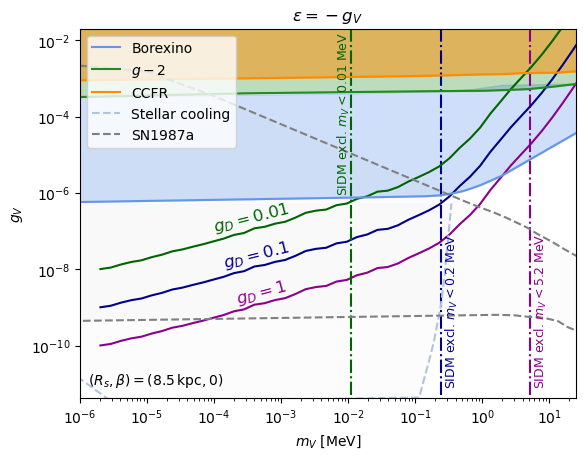

In [13]:
color = ['darkmagenta','','darkblue']
#for i in [0,2]:
#    plt.plot(eventEqual_beta[i,:,0],gV_EqualMv_constraint_beta[i],color=color[i])
#    plt.text(2e-3, (6*i+1)*7.8e-10, r'$\beta/\pi=$'+str(beta[i]), color=color[i],fontsize=12,rotation=17)
#plt.plot(mx_list,backgroundSK,'.',label='Background')
# gD = 1
plt.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD1_beta1[1],color='darkmagenta')
plt.text(2e-4, 1.3e-9, r'$g_D=1$', color='darkmagenta',fontsize=12,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
plt.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
plt.text(1.1*mV_excl_gD1, 1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)
# gD = 0.1
plt.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD01_beta1[1],color='darkblue')
plt.text(1.3e-4, 1.1e-8, r'$g_D=0.1$', color='darkblue',fontsize=12,rotation=14)
# SIDM
mV_excl_gD01 = mV_SIDM(0.1,10)
plt.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
plt.text(1.1*mV_excl_gD01, 1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=9,rotation=90)
# gD = 0.01
plt.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD001_beta1[1],color='darkgreen')
plt.text(9e-5, 1e-7, r'$g_D=0.01$', color='darkgreen',fontsize=12,rotation=14)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
plt.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
plt.text(mV_excl_gD001/1.7, 1.1e-6, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=9,rotation=90)

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$g_V$')
# Borexino
plt.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino',color='cornflowerblue')
plt.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
plt.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$',color='forestgreen')
plt.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
plt.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR',color='darkorange')
plt.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='darkorange')
# Stellar
plt.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',label='Stellar cooling',color='lightsteelblue')
plt.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
plt.plot(SN_equal.T[0],SN_equal.T[1],'--',label='SN1987a',color='gray')
plt.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
plt.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
plt.xlim(1e-6,25)
plt.ylim(4.2e-12,2e-2)
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_V$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$\varepsilon=-g_V$')
#plt.savefig('sensitivity_different_gD.pdf',bbox_inches = 'tight')

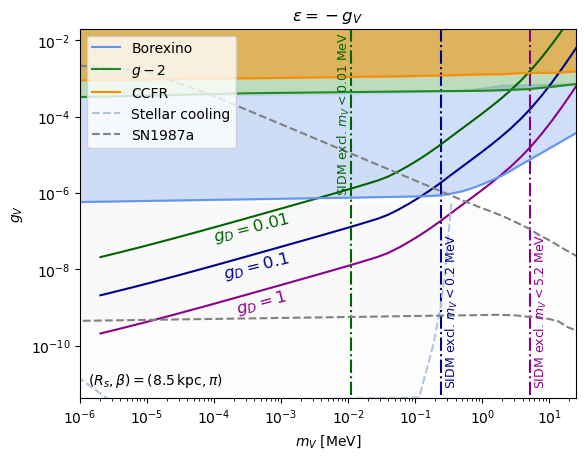

In [18]:
# gD = 1
plt.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD1_beta3[1],color='darkmagenta')
plt.text(2e-4, 1.3e-9/1.9, r'$g_D=1$', color='darkmagenta',fontsize=12,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
plt.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
plt.text(1.1*mV_excl_gD1, 1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)
# gD = 0.1
plt.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD01_beta3[1],color='darkblue')
plt.text(1.3e-4, 1.1e-8/1.9, r'$g_D=0.1$', color='darkblue',fontsize=12,rotation=14)
# SIDM
mV_excl_gD01 = mV_SIDM(0.1,10)
plt.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
plt.text(1.1*mV_excl_gD01, 1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=9,rotation=90)
# gD = 0.01
plt.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD001_beta3[1],color='darkgreen')
plt.text(9e-5, 1e-7/1.9, r'$g_D=0.01$', color='darkgreen',fontsize=12,rotation=14)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
plt.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
plt.text(mV_excl_gD001/1.7, 1.1e-6, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=9,rotation=90)

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$g_V$')
# Borexino
plt.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino',color='cornflowerblue')
plt.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
plt.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$',color='forestgreen')
plt.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
plt.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR',color='darkorange')
plt.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='darkorange')
# Stellar
plt.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',label='Stellar cooling',color='lightsteelblue')
plt.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
plt.plot(SN_equal.T[0],SN_equal.T[1],'--',label='SN1987a',color='gray')
plt.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
plt.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
plt.xlim(1e-6,25)
plt.ylim(4.2e-12,2e-2)
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_V$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$\varepsilon=-g_V$')
plt.savefig('sensitivity_different_gD_beta_pi.pdf',bbox_inches = 'tight')

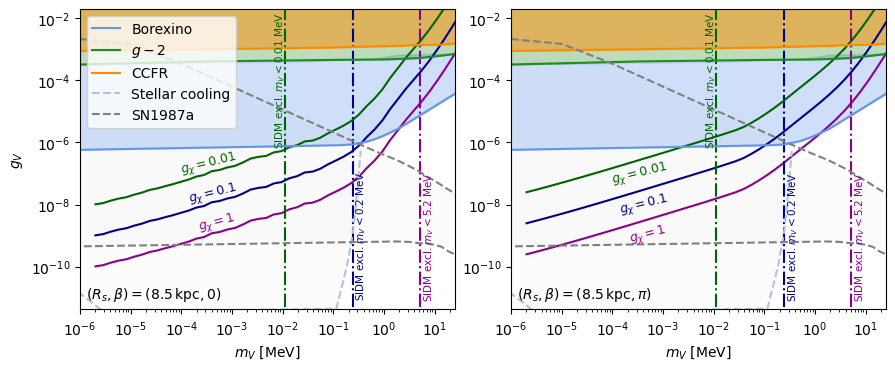

In [35]:
fig = plt.figure(figsize=(8*1.3,3*1.3))
gs = fig.add_gridspec(1, 2, hspace=0.3, wspace=0.15)
#fig.suptitle(r'$(m_\chi,T_\chi)=(0.1,10)\,{\rm MeV}~{\rm and}~R_s=8.5\,{\rm kpc}$')
(ax1, ax2) = gs.subplots(sharex='col')

color = ['darkmagenta','','darkblue']
#for i in [0,2]:
#    plt.plot(eventEqual_beta[i,:,0],gV_EqualMv_constraint_beta[i],color=color[i])
#    plt.text(2e-3, (6*i+1)*7.8e-10, r'$\beta/\pi=$'+str(beta[i]), color=color[i],fontsize=12,rotation=17)
#plt.plot(mx_list,backgroundSK,'.',label='Background')
# gD = 1
ax1.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD1_beta1[1],color='darkmagenta')
ax1.text(2e-4, 1.6e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
ax1.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax1.text(1.1*mV_excl_gD1, 1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=7.5,rotation=90)
# gD = 0.1
ax1.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD01_beta1[1],color='darkblue')
ax1.text(1.3e-4, 1.3e-8, r'$g_\chi=0.1$', color='darkblue',fontsize=9,rotation=14)
# SIDM
mV_excl_gD01 = mV_SIDM(0.1,10)
ax1.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
ax1.text(1.1*mV_excl_gD01, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=7.5,rotation=90)
# gD = 0.01
ax1.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD001_beta1[1],color='darkgreen')
ax1.text(9e-5, 1.1e-7, r'$g_\chi=0.01$', color='darkgreen',fontsize=9,rotation=14)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
ax1.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
ax1.text(mV_excl_gD001/1.7, 9e-7, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=7.5,rotation=90)
#ax1.xscale('log')
#ax1.yscale('log')
#ax1.ylabel(r'$g_V$')
# Borexino
ax1.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino',color='cornflowerblue')
ax1.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
ax1.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$',color='forestgreen')
ax1.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
ax1.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR',color='darkorange')
ax1.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='darkorange')
# Stellar
ax1.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',label='Stellar cooling',color='lightsteelblue')
ax1.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
ax1.plot(SN_equal.T[0],SN_equal.T[1],'--',label='SN1987a',color='gray')
ax1.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
ax1.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
ax1.set_xlim(1e-6,25)
ax1.set_ylim(4.2e-12,2e-2)
ax1.legend(loc='upper left')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$m_V$ [MeV]')
ax1.set_ylabel(r'$g_V$')


# gD = 1
ax2.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD1_beta3[1],color='darkmagenta')
ax2.text(2e-4, 1.3e-9/1.9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
#mV_excl_gD1 = mV_SIDM(1,10)
ax2.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax2.text(1.1*mV_excl_gD1, 1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=7.5,rotation=90)
# gD = 0.1
ax2.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD01_beta3[1],color='darkblue')
ax2.text(1.3e-4, 1.1e-8/1.9, r'$g_\chi=0.1$', color='darkblue',fontsize=9,rotation=14)
# SIDM
#mV_excl_gD01 = mV_SIDM(0.1,10)
ax2.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
ax2.text(1.1*mV_excl_gD01, 1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=7.5,rotation=90)
# gD = 0.01
ax2.plot(eventEqual_beta1_list[0,:,0],gV_EqualMv_constraint_gD001_beta3[1],color='darkgreen')
ax2.text(9e-5, 1e-7/1.9, r'$g_\chi=0.01$', color='darkgreen',fontsize=9,rotation=14)
# SIDM
#mV_excl_gD001 = mV_SIDM(0.01,10)
ax2.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
ax2.text(mV_excl_gD001/1.7, 9e-7, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=7.5,rotation=90)

#ax2.xscale('log')
#ax2.yscale('log')
#ax2.ylabel(r'$g_V$')
# Borexino
ax2.plot(Borexino_equal.T[0],Borexino_equal.T[1],label='Borexino',color='cornflowerblue')
ax2.fill_between(Borexino_equal.T[0],Borexino_equal.T[1],gm2_equal.T[1][:11],alpha=0.3,color='cornflowerblue')
# g-2
ax2.plot(gm2_equal.T[0],gm2_equal.T[1],label='$g-2$',color='forestgreen')
ax2.fill_between(gm2_equal.T[0],gm2_equal.T[1],1,alpha=0.3,color='forestgreen')
# CCFR
ax2.plot(CCFR_equal.T[0],CCFR_equal.T[1],label='CCFR',color='darkorange')
ax2.fill_between(CCFR_equal.T[0],CCFR_equal.T[1],1,alpha=0.5,color='darkorange')
# Stellar
ax2.plot(StarCool_equal.T[0],StarCool_equal.T[1],'--',label='Stellar cooling',color='lightsteelblue')
ax2.fill_between(StarCool_equal.T[0],StarCool_equal.T[1], StarCool_equal.T[1][-1],alpha=0.02,color='grey')
# SN
ax2.plot(SN_equal.T[0],SN_equal.T[1],'--',label='SN1987a',color='gray')
ax2.fill_between(SN_equal.T[0],SN_equal.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
ax2.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
ax2.set_xlim(1e-6,25)
ax2.set_ylim(4.2e-12,2e-2)
#ax2.legend(loc='upper left')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$m_V$ [MeV]')
#ax2.set_ylabel(r'$g_V$')
#ax2.set_title(r'$\beta=\pi$')
plt.savefig('../plots/sensitivity_gD_equal_eps.pdf',bbox_inches = 'tight')

In [27]:
# Constraint gV with gD = 1
gV_EqualMvNoEps_constraint_gD1_beta1 = []
gV_EqualMvNoEps_constraint_gD1_beta2 = []
gV_EqualMvNoEps_constraint_gD1_beta3 = []

for i in range(len(Rstar)):
    #gV_LightMv_constraint = []
    gV_EqualMvNoEps_constraint1 = []
    gV_EqualMvNoEps_constraint2 = []
    gV_EqualMvNoEps_constraint3 = []
    for j in range(len(mx_list)):
        # background
        b = backgroundSK_Rstar[i][j]
        # required s
        s = sensitivity(b)
        # constraint on gV, assuming gV = eps
        gV_EqualNoEps_required1 = (s/eventEqualNoEps_beta1_list[:,:,1][i,j])**0.25
        gV_EqualNoEps_required2 = (s/eventEqualNoEps_beta2_list[:,:,1][i,j])**0.25
        gV_EqualNoEps_required3 = (s/eventEqualNoEps_beta3_list[:,:,1][i,j])**0.25
        gV_EqualMvNoEps_constraint1.append(gV_EqualNoEps_required1)
        gV_EqualMvNoEps_constraint2.append(gV_EqualNoEps_required2)
        gV_EqualMvNoEps_constraint3.append(gV_EqualNoEps_required3)
    gV_EqualMvNoEps_constraint_gD1_beta1.append(gV_EqualMvNoEps_constraint1)
    gV_EqualMvNoEps_constraint_gD1_beta2.append(gV_EqualMvNoEps_constraint2)
    gV_EqualMvNoEps_constraint_gD1_beta3.append(gV_EqualMvNoEps_constraint3)

    #gV_LightMv_constraint_beta = np.array(gV_LightMv_constraint_beta)
gV_EqualMvNoEps_constraint_gD1_beta1 = np.array(gV_EqualMvNoEps_constraint_gD1_beta1)
gV_EqualMvNoEps_constraint_gD1_beta2 = np.array(gV_EqualMvNoEps_constraint_gD1_beta2)
gV_EqualMvNoEps_constraint_gD1_beta3 = np.array(gV_EqualMvNoEps_constraint_gD1_beta3)


# Constraint gV with gD = 0.1
gV_EqualMvNoEps_constraint_gD01_beta1 = []
gV_EqualMvNoEps_constraint_gD01_beta2 = []
gV_EqualMvNoEps_constraint_gD01_beta3 = []

for i in range(len(Rstar)):
    #gV_LightMv_constraint = []
    gV_EqualMvNoEps_constraint1 = []
    gV_EqualMvNoEps_constraint2 = []
    gV_EqualMvNoEps_constraint3 = []
    for j in range(len(mx_list)):
        # background
        b = backgroundSK_Rstar[i][j]
        # required s
        s = sensitivity(b)
        # constraint on gV, assuming gV = eps
        gV_EqualNoEps_required1 = (s/eventEqualNoEps_beta1_list[:,:,1][i,j]/0.1**4)**0.25
        gV_EqualNoEps_required2 = (s/eventEqualNoEps_beta2_list[:,:,1][i,j]/0.1**4)**0.25
        gV_EqualNoEps_required3 = (s/eventEqualNoEps_beta3_list[:,:,1][i,j]/0.1**4)**0.25
        gV_EqualMvNoEps_constraint1.append(gV_EqualNoEps_required1)
        gV_EqualMvNoEps_constraint2.append(gV_EqualNoEps_required2)
        gV_EqualMvNoEps_constraint3.append(gV_EqualNoEps_required3)
    gV_EqualMvNoEps_constraint_gD01_beta1.append(gV_EqualMvNoEps_constraint1)
    gV_EqualMvNoEps_constraint_gD01_beta2.append(gV_EqualMvNoEps_constraint2)
    gV_EqualMvNoEps_constraint_gD01_beta3.append(gV_EqualMvNoEps_constraint3)

    #gV_LightMv_constraint_beta = np.array(gV_LightMv_constraint_beta)
gV_EqualMvNoEps_constraint_gD01_beta1 = np.array(gV_EqualMvNoEps_constraint_gD01_beta1)
gV_EqualMvNoEps_constraint_gD01_beta2 = np.array(gV_EqualMvNoEps_constraint_gD01_beta2)
gV_EqualMvNoEps_constraint_gD01_beta3 = np.array(gV_EqualMvNoEps_constraint_gD01_beta3)



# Constraint gV with gD = 0.01
gV_EqualMvNoEps_constraint_gD001_beta1 = []
gV_EqualMvNoEps_constraint_gD001_beta2 = []
gV_EqualMvNoEps_constraint_gD001_beta3 = []

for i in range(len(Rstar)):
    #gV_LightMv_constraint = []
    gV_EqualMvNoEps_constraint1 = []
    gV_EqualMvNoEps_constraint2 = []
    gV_EqualMvNoEps_constraint3 = []
    for j in range(len(mx_list)):
        # background
        b = backgroundSK_Rstar[i][j]
        # required s
        s = sensitivity(b)
        # constraint on gV, assuming gV = eps
        gV_EqualNoEps_required1 = (s/eventEqualNoEps_beta1_list[:,:,1][i,j]/0.01**4)**0.25
        gV_EqualNoEps_required2 = (s/eventEqualNoEps_beta2_list[:,:,1][i,j]/0.01**4)**0.25
        gV_EqualNoEps_required3 = (s/eventEqualNoEps_beta3_list[:,:,1][i,j]/0.01**4)**0.25
        gV_EqualMvNoEps_constraint1.append(gV_EqualNoEps_required1)
        gV_EqualMvNoEps_constraint2.append(gV_EqualNoEps_required2)
        gV_EqualMvNoEps_constraint3.append(gV_EqualNoEps_required3)
    gV_EqualMvNoEps_constraint_gD001_beta1.append(gV_EqualMvNoEps_constraint1)
    gV_EqualMvNoEps_constraint_gD001_beta2.append(gV_EqualMvNoEps_constraint2)
    gV_EqualMvNoEps_constraint_gD001_beta3.append(gV_EqualMvNoEps_constraint3)

    #gV_LightMv_constraint_beta = np.array(gV_LightMv_constraint_beta)
gV_EqualMvNoEps_constraint_gD001_beta1 = np.array(gV_EqualMvNoEps_constraint_gD001_beta1)
gV_EqualMvNoEps_constraint_gD001_beta2 = np.array(gV_EqualMvNoEps_constraint_gD001_beta2)
gV_EqualMvNoEps_constraint_gD001_beta3 = np.array(gV_EqualMvNoEps_constraint_gD001_beta3)

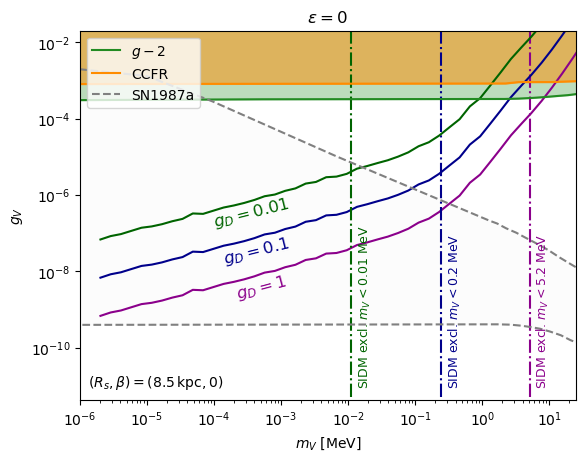

In [267]:
plt.plot(eventEqualNoEps_beta1_list[0,:,0],gV_EqualMvNoEps_constraint_gD1_beta1[1],color='darkmagenta')
plt.text(2e-4, 1.5*1.3e-9, r'$g_D=1$', color='darkmagenta',fontsize=12,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
plt.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
plt.text(6.1, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)
# gD = 0.1
plt.plot(eventEqualNoEps_beta1_list[0,:,0],gV_EqualMvNoEps_constraint_gD01_beta1[1],color='darkblue')
plt.text(1.3e-4, 1.5*1.1e-8, r'$g_D=0.1$', color='darkblue',fontsize=12,rotation=14)
# SIDM
mV_excl_gD01 = mV_SIDM(0.1,10)
plt.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
plt.text(0.3, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=9,rotation=90)
# gD = 0.01
plt.plot(eventEqualNoEps_beta1_list[0,:,0],gV_EqualMvNoEps_constraint_gD001_beta1[1],color='darkgreen')
plt.text(9e-5, 1.5e-7, r'$g_D=0.01$', color='darkgreen',fontsize=12,rotation=14)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
plt.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
plt.text(1.35e-2, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=9,rotation=90)

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$g_V$')
# g-2
plt.plot(gm2_nokin.T[0],gm2_nokin.T[1],label='$g-2$',color='forestgreen')
plt.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
plt.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],label='CCFR',color='darkorange')
plt.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='darkorange')
# SN
plt.plot(SN_nokin.T[0],SN_nokin.T[1],'--',label='SN1987a',color='gray')
plt.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
plt.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
plt.xlim(1e-6,25)
plt.ylim(4.2e-12,2e-2)
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_V$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$\varepsilon=0$')
plt.savefig('sensitivity_noeps_different_gD.pdf',bbox_inches = 'tight')

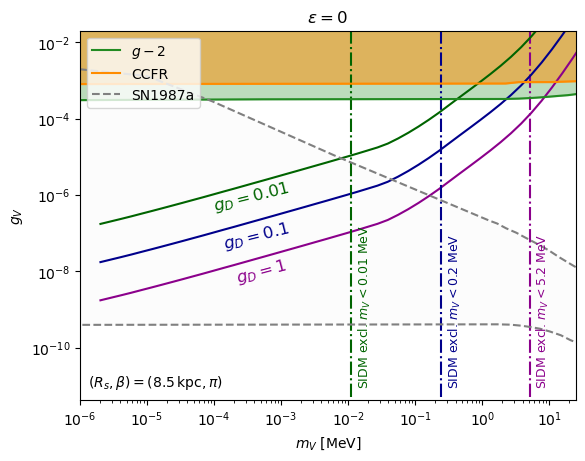

In [266]:
plt.plot(eventEqualNoEps_beta3_list[0,:,0],gV_EqualMvNoEps_constraint_gD1_beta3[1],color='darkmagenta')
plt.text(2e-4, 5e-9, r'$g_D=1$', color='darkmagenta',fontsize=12,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
plt.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
plt.text(6.1, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=9,rotation=90)
# gD = 0.1
plt.plot(eventEqualNoEps_beta3_list[0,:,0],gV_EqualMvNoEps_constraint_gD01_beta3[1],color='darkblue')
plt.text(1.3e-4, 4e-8, r'$g_D=0.1$', color='darkblue',fontsize=12,rotation=14)
# SIDM
mV_excl_gD01 = mV_SIDM(0.1,10)
plt.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
plt.text(0.3, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=9,rotation=90)
# gD = 0.01
plt.plot(eventEqualNoEps_beta3_list[0,:,0],gV_EqualMvNoEps_constraint_gD001_beta3[1],color='darkgreen')
plt.text(9e-5, 4e-7, r'$g_D=0.01$', color='darkgreen',fontsize=12,rotation=14)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
plt.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
plt.text(1.35e-2, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=9,rotation=90)

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$g_V$')
# g-2
plt.plot(gm2_nokin.T[0],gm2_nokin.T[1],label='$g-2$',color='forestgreen')
plt.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
plt.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],label='CCFR',color='darkorange')
plt.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='darkorange')
# SN
plt.plot(SN_nokin.T[0],SN_nokin.T[1],'--',label='SN1987a',color='gray')
plt.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
plt.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
plt.xlim(1e-6,25)
plt.ylim(4.2e-12,2e-2)
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_V$ [MeV]')
plt.ylabel(r'$g_V$')
plt.title(r'$\varepsilon=0$')
plt.savefig('sensitivity_noeps_different_gD_beta_pi.pdf',bbox_inches = 'tight')

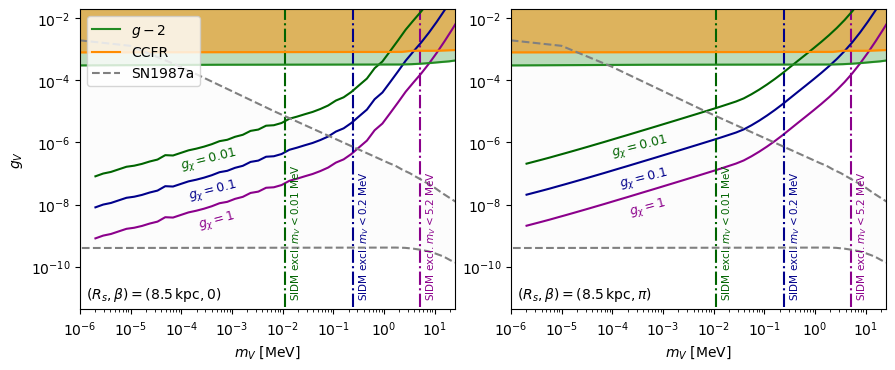

In [29]:
fig = plt.figure(figsize=(8*1.3,3*1.3))
gs = fig.add_gridspec(1, 2, hspace=0.3, wspace=0.15)
#fig.suptitle(r'$(m_\chi,T_\chi)=(0.1,10)\,{\rm MeV}~{\rm and}~R_s=8.5\,{\rm kpc}$')
(ax1, ax2) = gs.subplots(sharex='col')

ax1.plot(eventEqualNoEps_beta1_list[0,:,0],gV_EqualMvNoEps_constraint_gD1_beta1[1],color='darkmagenta')
ax1.text(2e-4, 1.5*1.3e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
mV_excl_gD1 = mV_SIDM(1,10)
ax1.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax1.text(6.1, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=7.5,rotation=90)
# gD = 0.1
ax1.plot(eventEqualNoEps_beta1_list[0,:,0],gV_EqualMvNoEps_constraint_gD01_beta1[1],color='darkblue')
ax1.text(1.3e-4, 1.5*1.1e-8, r'$g_\chi=0.1$', color='darkblue',fontsize=9,rotation=14)
# SIDM
mV_excl_gD01 = mV_SIDM(0.1,10)
ax1.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
ax1.text(0.3, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=7.5,rotation=90)
# gD = 0.01
ax1.plot(eventEqualNoEps_beta1_list[0,:,0],gV_EqualMvNoEps_constraint_gD001_beta1[1],color='darkgreen')
ax1.text(9e-5, 1.5e-7, r'$g_\chi=0.01$', color='darkgreen',fontsize=9,rotation=14)
# SIDM
mV_excl_gD001 = mV_SIDM(0.01,10)
ax1.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
ax1.text(1.35e-2, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=7.5,rotation=90)

# g-2
ax1.plot(gm2_nokin.T[0],gm2_nokin.T[1],label='$g-2$',color='forestgreen')
ax1.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
ax1.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],label='CCFR',color='darkorange')
ax1.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='darkorange')
# SN
ax1.plot(SN_nokin.T[0],SN_nokin.T[1],'--',label='SN1987a',color='gray')
ax1.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
ax1.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},0)$',fontsize=10)
ax1.set_xlim(1e-6,25)
ax1.set_ylim(4.2e-12,2e-2)
ax1.legend(loc='upper left')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$m_V$ [MeV]')
ax1.set_ylabel(r'$g_V$')
#ax1.title(r'$\varepsilon=0$')

ax2.plot(eventEqualNoEps_beta3_list[0,:,0],gV_EqualMvNoEps_constraint_gD1_beta3[1],color='darkmagenta')
ax2.text(2e-4, 5e-9, r'$g_\chi=1$', color='darkmagenta',fontsize=9,rotation=15)
# SIDM
#mV_excl_gD1 = mV_SIDM(1,10)
ax2.plot([mV_excl_gD1,mV_excl_gD1],[5e-12,2e-2],'-.',color='darkmagenta')
ax2.text(6.1, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD1:.1f} MeV', color='darkmagenta',fontsize=7.5,rotation=90)
# gD = 0.1
ax2.plot(eventEqualNoEps_beta3_list[0,:,0],gV_EqualMvNoEps_constraint_gD01_beta3[1],color='darkblue')
ax2.text(1.3e-4, 4e-8, r'$g_\chi=0.1$', color='darkblue',fontsize=9,rotation=14)
# SIDM
#mV_excl_gD01 = mV_SIDM(0.1,10)
ax2.plot([mV_excl_gD01,mV_excl_gD01],[5e-12,2e-2],'-.',color='darkblue')
ax2.text(0.3, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD01:.1f} MeV', color='darkblue',fontsize=7.5,rotation=90)
# gD = 0.01
ax2.plot(eventEqualNoEps_beta3_list[0,:,0],gV_EqualMvNoEps_constraint_gD001_beta3[1],color='darkgreen')
ax2.text(9e-5, 4e-7, r'$g_\chi=0.01$', color='darkgreen',fontsize=9,rotation=14)
# SIDM
#mV_excl_gD001 = mV_SIDM(0.01,10)
ax2.plot([mV_excl_gD001,mV_excl_gD001],[5e-12,2e-2],'-.',color='darkgreen')
ax2.text(1.35e-2, 1.1e-11, f'SIDM excl. $m_V<${mV_excl_gD001:.2f} MeV', color='darkgreen',fontsize=7.5,rotation=90)

# g-2
ax2.plot(gm2_nokin.T[0],gm2_nokin.T[1],label='$g-2$',color='forestgreen')
ax2.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
ax2.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],label='CCFR',color='darkorange')
ax2.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='darkorange')
# SN
ax2.plot(SN_nokin.T[0],SN_nokin.T[1],'--',label='SN1987a',color='gray')
ax2.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-30,alpha=0.02,color='gray')
# show Rs
ax2.text(1.3e-6, 1e-11, r'$(R_s,\beta)=(8.5\,{\rm kpc},\pi)$',fontsize=10)
ax2.set_xlim(1e-6,25)
ax2.set_ylim(4.2e-12,2e-2)
#ax2.legend(loc='upper left')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel(r'$m_V$ [MeV]')
#ax2.set_ylabel(r'$g_V$')
#ax2.title(r'$\varepsilon=0$')
plt.savefig('../plots/sensitivity_gD_noeps.pdf',bbox_inches = 'tight')

Text(0.5, 1.0, '$\\epsilon=0$ and $g_D=1$ with thermal relic $m_V/m_\\chi\\sim 1$')

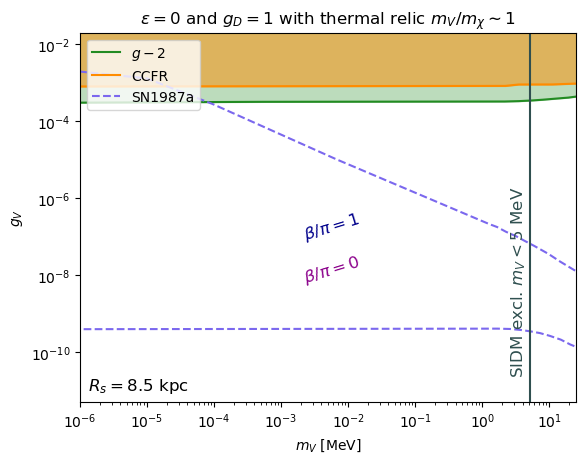

In [236]:
color = ['darkmagenta','','darkblue']
for i in [0,2]:
    plt.plot(eventEqual_beta[i,:,0],gV_EqualMvNoEps_constraint_beta[i],'-.',color=color[i])
    plt.text(2e-3, (6*i+1)*6.5e-9, r'$\beta/\pi=$'+str(beta[i]), color=color[i],fontsize=12,rotation=17)
#plt.plot(mx_list,backgroundSK,'.',label='Background')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$g_V$')
# g-2
plt.plot(gm2_nokin.T[0],gm2_nokin.T[1],label='$g-2$',color='forestgreen')
plt.fill_between(gm2_nokin.T[0],gm2_nokin.T[1], 1,alpha=0.3,color='forestgreen')
# CCFR
plt.plot(CCFR_nokin.T[0],CCFR_nokin.T[1],label='CCFR',color='darkorange')
plt.fill_between(CCFR_nokin.T[0],CCFR_nokin.T[1], 1,alpha=0.5,color='darkorange')
# SN
plt.plot(SN_nokin.T[0],SN_nokin.T[1],'--',label='SN1987a',color='mediumslateblue')
#plt.fill_between(SN_nokin.T[0],SN_nokin.T[1],1e-20,alpha=0.3,color='mediumslateblue')
# SIDM
plt.plot([5.17,5.17],[5e-12,2e-2],color='darkslategrey')
plt.text(2.5, 3e-11, 'SIDM excl. $m_V< 5$ MeV', color='darkslategrey',fontsize=12,rotation=90)
# show Rs
plt.text(1.3e-6, 1e-11, r'$R_s=8.5$ kpc',fontsize=12)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$m_V$ [MeV]')
plt.ylabel(r'$g_V$')
plt.xlim(1e-6,25)
plt.ylim(5e-12,2e-2)
plt.legend(loc='upper left')
plt.title(r'$\epsilon=0$ and $g_D=1$ with thermal relic $m_V/m_\chi\sim 1$')
#plt.savefig('sensitivity_thermal_mV_noEps.pdf',bbox_inches = 'tight')